# Proyecto Final: Dinámica de Anillos Planetarios

### Física Computacional 2025-2

Nombre: Pichardo Rico Cristian Eduardo

In [1]:
##Importamos las librerías que vamos a ocupar.
import math as m
import numpy as np
import scipy.special as sp
import scipy.integrate as si
import scipy.linalg as sl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## Introducción

Vamos a explorar la formación y la dinámica de los anillos planetarios, como los de Saturno, éstos están compuestos por partículas de roca y hielo de diferentes tamaños que van desde los micrómetros hasta decenas de metros. El comportamiento colectivo del anillo está regido por la interacción gravitacional con el planeta que orbitan, además de algunos efectos inerciales provocados por el marco de referencia rotacional. 

Es importante el estudio de los anillos planetarios debido a que son un medio para estudiar la formación y evolución de materia alrededor de cuerpos másivos como lo pueden ser los discos de acreción durante el nacimiento de las estrellas, el disco de acreción formado alrededor de un agujero negro que está consumiendo materia o, incluso, los discos galácticos.

### Ecuaciones de movimiento

Como estamos estudiando partículas que están orbitando un planeta que gira a velocidad angular constante $\omega$, quizá es más conveniente tener un sistema de referencia que rota junto a la partícula, es decir, un sistema que gira con velocidad angular constante $\omega$. Esto es importante porque *elimina* la rotación global y nos va a permitir visualizar las órbitas de las partículas con respecto a un sistema fijo debido a que estaremos rotando al mismo tiempo que el planeta. 

En este sistema, cada partícula de masas $m$ siente la atracción del planeta de masa $M$ descrita mediante la **gravitación universal** de Newton:
$$
\vec F_g=-G\ \frac{Mm}{r^2}\hat r
$$
donde $G$ es la constante de gravitación universal y $r$ es el vector de posición relativo al centro planetario.

Además, en este marco, aparece la fuerza ficticia denominada como **fuerza de Coriolis**, definida como:
$$
\vec F_{cor}=-2m\omega\ \hat  z\times \vec v'
$$

donde $\vec v'$ es la velocidad de la partícula y $\hat z$ el vector unitario perpendicular al plano del anillo.

Y, también tenemos la fuerza ficticia denominada como **fuerza centrífuga** definida como:
$$
\vec F_{cen}=m\vec a_{cen}=m\omega^2\vec r=m\omega^2r\hat e_r
$$

donde $\omega$ es la velocidad ángular constante de rotación del marco que es igual a la del planeta.

De estas fuerzas que aparecen, solo la de Coriolis no tiene un potencial asociado debido a que es dependiente de la velocidad y, por tanto, no es una fuerza conservativa. 

El potencial gravitatorio es:
$$
U_g(r)=-G \ \frac{Mm}{r}
$$
Y para la fuerza centrífuga es:
$$
U_{cen}=-\frac{1}{2}m\omega^2r^2
$$

Por lo que, el potencial efectivo es:
$$
U_{eff}(x\text{, }y)=U_g+U_{cen}= -G \ \frac{Mm}{r} -\frac{1}{2}m\omega^2r^2= -G \ \frac{Mm}{\sqrt{x^2+y^2}}-\frac{1}{2}m\omega^2(x^2+y^2)
$$

De esta forma, las ecuaciones de movimiento en coordenadas cartesianas se escriben como:
$$
m\ddot r=-\nabla U_{eff}-2m\omega\ \hat  z\times \vec v'
$$

### Resonancias y estructura de los anillos

Un fenómeno central importante a la hora de estudiar la dinámica de anillos es la existencia de **resonancias orbitales**, donde la frecuencia orbital de una partícula se relaciona de manera racional con la frecuencia de algún satélite cercano. Las resonancias de Lindblad son responsables de la formación de huecos y aumentos de densidad en los anillos y están asociadas con la División de Cassini en los anillos de Saturno, por ejemplo.

Ahora, para un potencial puramente gravitatorio en un campo central, tenemos que la velocidad angular $\omega_p$ con la que una partícula describiría una órbita circular de radio $r$ es:
$$
\omega_p(r) = \sqrt{\dfrac{G\ M}{r^3}}
$$

Ahora, para nuestro caso, estamos trabajando con un potencial efectivo $U_{eff}$, por lo que, las oscilaciones pequeñas en $r$ alrededor de una órbita circular se describen por:
$$
\kappa^2(r)=\frac{1}{m}\frac{d^2 U_{eff}}{dr^2}+\frac{3}{rm}\frac{dU_{eff}}{dr}
$$

En el límite cuando $\omega<<<\omega_p$ tenemos que:
$$
\kappa(r)\approx \omega_p(r)
$$
aunque, en general, hay correciones que desplazan ligeramente la resonancia

Ahora, una **resonancia de Lindblad** de orden $m:n$ aparece cuando el forzamiento periódico ejercido por un cuerpo perturbador, como lo puede ser un satélite, coincide con la frecuencia natural de las oscilaciones epicíclicas de las partículas del anillo. Formalmente, para una resonancia $m:n$ en el sistema corotante con velocidad angular del satélite $\omega_s$, tenemos que:
$$
m[\omega_p(r_{res})-\omega_s]=\pm n\kappa(r_{res})
$$
donde $r_{res}$ es el radio resonante y es la distancia al centro planetario en la cual se cumple la condición de resonancia de Lindblad para un cierto par de enteros $m:n$. Además $\omega_s$ está definido como:
$$
\omega_s = \sqrt{\dfrac{G\ M}{R_s^3}}
$$

donde $R_s$ es el radio orbital del satélite.

En ésta ecuación el signo positivo corresponde a una *resonancia de Lindblad externa*, es decir, fuera de la órbita del satélite, mientras que el signo negativo se refiere a una *resonancia de Lindblad interna* o dentro de la órbita del satélite.

Una forma muy conocida es la resonancia $2:1$ interna, la cuál cumple que:
$$
2[\omega_p(r_{res})-\omega_s]=-\kappa(r_{res}) \ \ \ \Longrightarrow \ \ \ \omega_p(r_{res})-\omega_s=-\ \dfrac{1}{2}\kappa(r_{res})
$$

Suponiendo que $\omega<<<\omega_p$ entonces $\kappa\approx \omega_p$, por lo que:
$$
\omega_p-\omega_s=-\ \dfrac{1}{2}\omega_p \ \ \ \Longrightarrow \ \ \ \omega_p+\dfrac{1}{2}\omega_p=\omega_s
$$
$$
\Longrightarrow \ \ \ \dfrac{\omega_p}{\omega_s}=\dfrac{2}{3}
$$

Como:
$$
\omega_p(r) = \sqrt{\dfrac{G\ M}{r_{res}^3}}\text{, } \ \ \ \ \ \ \omega_s = \sqrt{\dfrac{G\ M}{R_s^3}}
$$

Tenemos que:
$$
\dfrac{\omega_p}{\omega_s}=\dfrac{\sqrt{\dfrac{G\ M}{r_{res}^3}}}{\sqrt{\dfrac{G\ M}{R_s^3}}}=\sqrt{\dfrac{G\ M\ R_s^3}{G\ M\ r_{res}^3}}=\sqrt{\dfrac{R_s^3}{r_{res}^3}}=\dfrac{2}{3}
$$
$$
\Longrightarrow \ \ \ \dfrac{R_s^3}{r_{res}^3}=\left(\dfrac{2}{3}\right)^2 \ \ \ \Longrightarrow \ \ \ \dfrac{R_s}{r_{res}}=\left(\dfrac{2}{3}\right)^{\dfrac{2}{3}}
$$
$$
\therefore \ \ \ r_{res}=\left(\dfrac{3}{2} \right)^{\dfrac{2}{3}}R_s
$$

donde $r_{res}$ es el radio resonante y $R_s$ es el radio orbital del satélite.

Estas resonancias actúan como filtros, es decir, en ciertas distancias del planeta, las perturbaciones se refuerzan periódicamente, acumulando o evacuando partículas, por lo que podemos observar distintos huecos o franjas sin materia dentro de los anillos.

## Método de  Leapfrog

### Teoría

Uno de los principales problemas a los que nos enfrentamos parte del hecho de que el integrador de Runge-Kutta sufre de un problema relacionado con la conservación de las propiedades de un sistema Hamiltoniano (como el problema de los dos cuerpos) en el espacio de fases y, además, no conserva la energía ni las propiedades simplécticas del sistema en el espacio de fases, es decir, el error en la energía hamiltoniana crece o decrece sin límite, alterando gradualmente la dinámica.

Esto hace que el integrador de Runge-Kutta sea inapropiado para cálculos de larga duración en los cuales se debe garantizar la preservación de las integrales de movimiento, en particular para la integración del movimiento orbital a grandes periodos de tiempo.

Ahora, veamos que el **integrador de Leapfrog** es de tipo simpléctico, es decir, es capaz de preservar cantidades como la energía especifica a través del tiempo.

Consideremos una ecuación de movimiento unidimensional de la forma:
$$
F(x(t)\text{, }\dot x(t)\text{, } t)=m\ddot x(t)
$$

Para resolver esta ecuación debemos conocer los valores de $x$ y $\dot x$ en cada instante de tiempo.

Primeramente, vamos a aplicar la expansión en Taylor alrededor del instante $t$ sobre la función $x(t+\Delta t)$, es decir:
$$
x(t+\Delta t)\approx x(t)+v(t)\Delta t+ \frac{1}{2}a(t)\Delta t^2=x(t)+\Delta t\left(v(t)+\frac{1}{2}a(t)\Delta t  \right)
$$
Definimos:
$$
v\left(t+\dfrac{\Delta t}{2}\right)=v(t)+\frac{1}{2}a(t)\Delta t
$$
Por lo que:
$$
x(t+\Delta t)\approx x(t)+ v\left(t+\dfrac{\Delta t}{2}\right)\Delta t
$$

Notemos que para encontrar la posición un instante de tiempo $\Delta t$ posterior, necesitamos conocer la velocidad en un instante $\dfrac{\Delta t}{2}$, es decir, a mitad del intervalo de tiempo. Esa velocidad se expresa en función de la aceleración como:
$$
v\left(t+\dfrac{\Delta t}{2}\right)=v\left(t-\dfrac{\Delta t}{2}\right)+a(t)\Delta t
$$

Como los instantes de tiempo considerados hacen parte de una rejilla unidimensional de $n$ entradas donde $n$ es el tiempo total de integración y, además, es discreto, entonces conviene reescribir las expresiones del método Leapfrog en términos de un subíndice que denote el instante de tiempo considerado:
$$
x_{n+\frac{1}{2}}=x_n+\dfrac{\Delta t}{2}v_n
$$
$$
v_{n+1}=v_n+\Delta t \ a(x_{n+\frac{1}{2}}) 
$$
$$
x_{n+1}=x_{n+\frac{1}{2}}+\dfrac{\Delta t}{2}v_{n+1}
$$

### Integración de Leapfrog

Algo importante a mencionar es que el módelo que vamos a utilizar es para partículas de prueba (*test particles*), lo cuál implica que las partículas que vamos a simular no tienen una *masa efectiva* o, dicho de otra forma, su masa es tan pequeña que no influyen gravitacionalmente entre ellas y solo responden a un potencial externo dominante, que en este caso es el del planeta que órbitan.

Esto tiene una justificación física y es que, en muchos sistemas como los anillos planetarios, la masa total del anillo es muchísimo menor que la masa del planeta, por ejemplo, se ha estimado que el anillo de Saturno representa menos del $0.02$% de su masa de nuestra Luna y, aún más, el tamaño de cada partícula que lo conforman son insignificantes ante el tamaño del planeta, por lo cual, la gravedad del planeta domina completamente sobre las partículas del anillo. Por lo que, las fuerzas mutuas entre las partículas del anillo son mucho menores y se pueden despreciar en una primera aproximación. 

Esto nos dará varias ventajas computacionales debido a que simular las interacciones entre $N$ partículas más la interacción gravitatoria del planeta cuesta bastante en términos de energía y memoria, por lo que, si en primera instancia, apróximamos el sistema a que cada partícula solo interactue con la gravitación del planeta, más los efectos de estar en un marco de referencia no inercial, podremos simular miles de partículas de forma rápida y eficiente.

In [2]:
##Implementemos la integración Leapfrog pero en 2D

##Definimos una función que realiza un paso del método Leapfrog (drift–kick–drift)
def paso_leapfrog(posiciones, velocidades, dt, calcula_aceleracion, tiempo):
    ##Drift medio. Avanzamos posiciones medio paso con las velocidades actuales
    pos_media = posiciones + 0.5 * dt * velocidades

    ##Calculamos aceleración en el punto medio
    acel_media = calcula_aceleracion(pos_media, velocidades, tiempo + 0.5 * dt)

    ##Kick completo. Actualizamos velocidades un paso completo usando acel_media
    vel_nueva = velocidades + dt * acel_media

    ##Drift final. Avanzamos posiciones otro medio paso con las nuevas velocidades
    pos_nueva = pos_media + 0.5 * dt * vel_nueva

    return pos_nueva, vel_nueva  ##Regresamos las posiciones y la velocidad actualizadas

In [3]:
##Definimos una función que calcula la aceleración total en el marco corotante
def aceleraciones_efectivas(posiciones, velocidades, tiempo, G, M, omega):
    ##Distancias radiales de cada partícula al centro
    radios = np.linalg.norm(posiciones, axis=1)

    ##Aceleración gravitatoria: -G M * r_vec / r^3
    acel_grav = -G * M * posiciones / (radios[:, None]**3)

    ##Aceleración centrífuga: + omega^2 * r_vec
    acel_cen  = omega**2 * posiciones

    ##Aceleración de Coriolis: -2 * omega * z_hat × v
    ##En 2D es z_hat × v = (-v_y, +v_x)
    acel_cor  = -2 * omega * np.column_stack((-velocidades[:,1],
                                              velocidades[:,0]))

    ##Suma de todas las aceleraciones
    return acel_grav + acel_cen + acel_cor

In [4]:
##Definimos una función para comprobar conservación de energía
def energia_efectiva(pos, vel, G, M, omega):
    T = 0.5 * np.sum(np.linalg.norm(vel, axis=1)**2)
    radios = np.linalg.norm(pos, axis=1)
    U_grav = -G * M * np.sum(1.0 / radios)
    U_cen = -0.5 * omega**2 * np.sum(radios**2)
    return T + U_grav + U_cen

### Ejemplo de anillo con órbita estable

Probemos nuestros códigos gráficando un anillo estable alrededor de un planeta, es decir, que la orbita del anillo alrededor del planeta no cambie con el tiempo. Para ello debemos asegurar que la fuerza gravitatoria del cuerpo que lo atrae hacia el centro se compense exactamente con la fuerza centrífuga aparente en ese mismo marco, es decir:
$$
\dfrac{G\ M}{r_0^2}=\omega^2\ r_0
$$

De esta ecuación obtenemos la condición sobre la velocidad angular:
$$
\omega=\sqrt{\dfrac{G\ M}{r_0^3}}
$$

Además, para que no haya velocidad relativa en el anillo, las velocidades iniciales deben estar dadas por:
$$
\vec v_i = \omega \ \hat z \times \vec r_i
$$

Lo que en magnitud es:
$$
v_{circ}=\omega\ r_0=\sqrt{\dfrac{G\ M}{r_0}}
$$

Si esto se cumple, en el sistema que gira con velocidad ángular $\omega$, todas las partículas quedan se quedarán *quietas* sobre el círculo de radio $r_0$ y la órbita será perfectamente estable.

In [5]:
##Parámetros de la simulación
N = 1000       ##número de partículas
tiempo_max= 100.0      ##tiempo total de integración
dt = 0.001       ##paso de tiempo

G = 6.6743e-11  ##Constante gravitatoria
M = 1.0         ##Masa del planeta
radio0 = 1.2    ##Radio inicial del anillo

##Velocidad orbital circular en r = radio0
v_circ = np.sqrt(G * M / radio0)

##velocidad angular para un anillo estable
omega  = np.sqrt(G * M / radio0**3)

##Condiciones iniciales del anillo circular
angulos = np.linspace(0, 2*np.pi, N, endpoint=False)
pos  = np.column_stack([radio0*np.cos(angulos),
                        radio0*np.sin(angulos)])
vel  = np.column_stack([-v_circ*np.sin(angulos),
                         v_circ*np.cos(angulos)])

##Guardamos el estado inicial para comparar
pos0 = pos.copy()
vel0 = vel.copy()

##Preparamos función de aceleraciones
fuerza = lambda p, v, t: aceleraciones_efectivas(p, v, t, G, M, omega)

##Listas para energía y tiempos
energias = [energia_efectiva(pos, vel, G, M, omega)]
tiempos = [0.0]

##Bucle principal de integración
t = 0.0
while t < tiempo_max:
    pos, vel = paso_leapfrog(pos, vel, dt, fuerza, t)
    t += dt
    energias.append(energia_efectiva(pos, vel, G, M, omega))
    tiempos.append(t)

print("Simulación terminada")

Simulación terminada


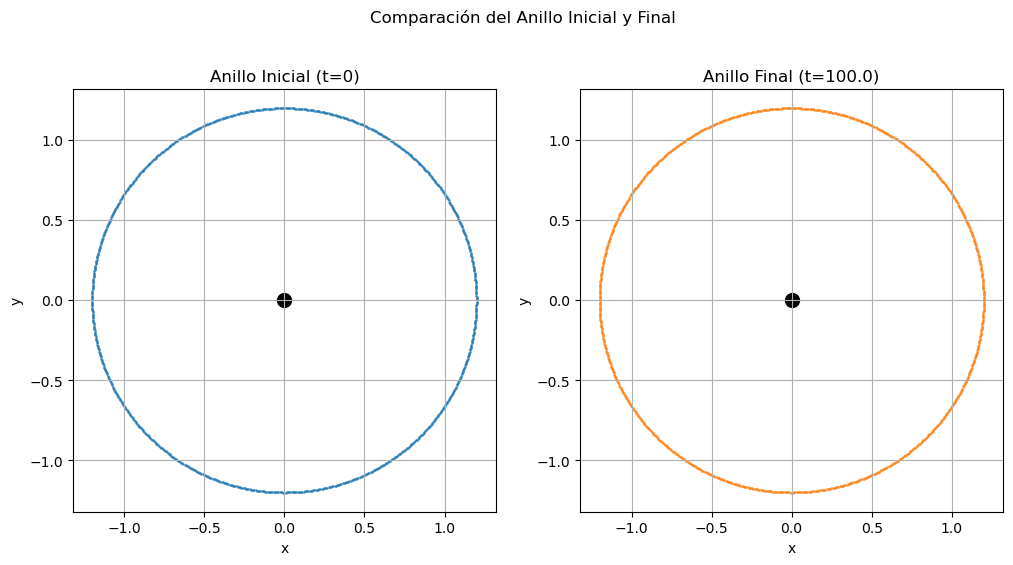

In [6]:
##Ahora, gráfiquemos el anillo inicial y el anillo final para compararlos.

##Creamos la figura y el sistema de ejes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

##Parámetros del planeta
planeta_pos = np.array([[0.0, 0.0]])
planeta_size = 100
planeta_color = 'black'

##Anillo inicial
axes[0].scatter(pos0[:,0], pos0[:,1], s=1, alpha=0.6, color='C0')
axes[0].scatter(planeta_pos[:,0], planeta_pos[:,1], s=planeta_size, c=planeta_color, marker='o', label='Planeta')
axes[0].set_aspect('equal', 'box')
axes[0].set_title('Anillo Inicial (t=0)')
axes[0].set_xlabel('x'); axes[0].set_ylabel('y')
axes[0].grid()

##Anillo final
axes[1].scatter(pos[:,0], pos[:,1], s=1, alpha=0.6, color='C1')
axes[1].scatter(planeta_pos[:,0], planeta_pos[:,1], s=planeta_size, c=planeta_color, marker='o', label='Planeta')
axes[1].set_aspect('equal', 'box')
axes[1].set_title(f'Anillo Final (t={tiempo_max:.1f})')
axes[1].set_xlabel('x'); axes[1].set_ylabel('y')
axes[1].grid()

plt.suptitle('Comparación del Anillo Inicial y Final') ##Título general
plt.show()

Veamos que ambos anillos son prácticamente iguales, lo que confirmaría que, pese a la integración numérica, las partículas quedaron en la misma órbita circular de radio $r=1.2$, esto nos dice dos cosas importantes: 
- El integrador Leapfrog está funcionando de forma estable.
- Nuestro marco de referencia no inercial con $\omega$ ajustado a la velocidad orbital canceló correctamente las fuerzas centrífugas, de modo que la configuración no se distorsionó.

Veamos la diferencia porcentual entre los radios inicial y final para confirmar esto.

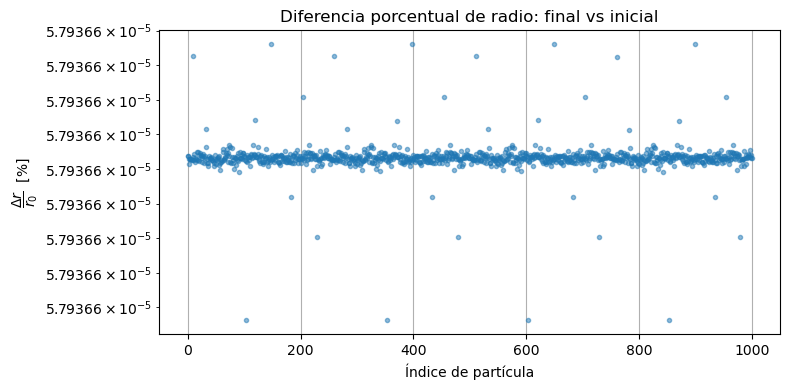

In [7]:
##Diferencia porcentual de radios

##Calculamos radios
radios0 = np.linalg.norm(pos0, axis=1) ##Radios iniciales
radios_f = np.linalg.norm(pos,  axis=1) ##Radios finales

##Calculamos la diferencia porcentual
delta_p = 100* (radios_f - radios0) / radios0

##Gráficamos las diferencias relativas
plt.figure(figsize=(8,4))
plt.plot(delta_p, marker='.', linestyle='none', alpha=0.5)
plt.yscale('log')
plt.xlabel('Índice de partícula')
plt.ylabel(r'$\dfrac{\Delta r}{r_0}$  [%]')
plt.title('Diferencia porcentual de radio: final vs inicial')
plt.grid()
plt.tight_layout()
plt.show()

En este caso, veamos que el método conserva perfectamente la órbita circular, es decir, se formó una órbita estable, por lo que, las diferencias porcentuales de los radios se agrupan alrededor del $0\%$. También, notemos que hay un ligero ruido de dispersión en algunos puntos, pero quedan por debajo del $(5.79\times 10^{-5})\%$ del error porcentual, esto está dentro del error aceptable y es normal debido a errores numéricos de truncamiento y redondeo.

Ahora veamos la conservación de energía del sistema, para ello tenemos que la variación relativa de la energía a traves del tiempo de integración viene dada por:
$$
\dfrac{\Delta E}{E_0}=\dfrac{E(t)-E_0}{|E_0|}
$$
donde $E(t)$ es la energía efectiva total en cada $t$ y $E_0=E(0)$ es el valor inicial de esa misma energía.

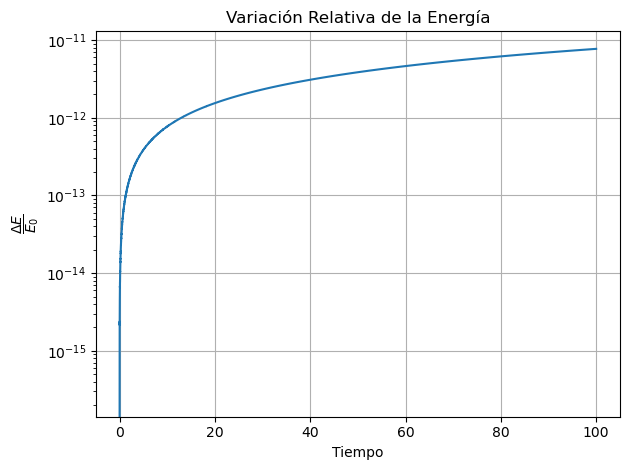

In [8]:
##Conservación de la energía del sistema

##Calculamos la variación relativa
deltaE = (np.array(energias) - energias[0]) / abs(energias[0])

##Gráficamos
plt.plot(tiempos, deltaE)
plt.yscale('log')
plt.xlabel('Tiempo'), plt.ylabel(r'$\dfrac{\Delta E}{E_0}$')
plt.title('Variación Relativa de la Energía')
plt.grid()
plt.tight_layout()
plt.show()

Veamos que la variación de energía queda por debajo de $10^{-11}$, además que observamos como se va acotando, es decir, está más que comprobado que la energía se conserva para todos los efectos.

## Distribución de densidad radial uniforme

### Órbita no-estable

Ahora vamos a elegir una función de densidad radial $\sum (r)$, en este primer caso, lo más sencillo sería elegir una distribución uniforme entre dos radios, uno interior $r_{int}$ y uno exterior $r_{out}$. Luego, debemos muestrear las $N$ partículas con diferentes radios $r_i$ tomados de la distribución uniforme y también debemos muestrear los ángulos $\theta_i$ para cada partícula, en este caso también será de manera uniforme entre $0$ y $2\pi$.

In [9]:
##Recuperamos las funciones principales a utilizar
def paso_leapfrog(posiciones, velocidades, dt, calcula_aceleracion, tiempo):
    ##Drift medio. Avanzamos posiciones medio paso con las velocidades actuales
    pos_media = posiciones + 0.5 * dt * velocidades

    ##Calculamos aceleración en el punto medio
    acel_media = calcula_aceleracion(pos_media, velocidades, tiempo + 0.5 * dt)

    ##Kick completo. Actualizamos velocidades un paso completo usando acel_media
    vel_nueva = velocidades + dt * acel_media

    ##Drift final. Avanzamos posiciones otro medio paso con las nuevas velocidades
    pos_nueva = pos_media + 0.5 * dt * vel_nueva

    return pos_nueva, vel_nueva  ##Regresamos las posiciones y la velocidad actualizadas


def aceleraciones_corrotante_var(pos, vel, tiempo):
    ##Calculamos radios
    r = np.linalg.norm(pos, axis=1)  
    ##ω_i = sqrt(G M / r_i^3)
    omega = np.sqrt(G * M / r**3)            
    ##Gravitación
    a_g   = -G * M * pos / (r[:,None]**3)
    ##Centrífuga local
    a_cen = (omega**2)[:,None] * pos
    ##Coriolis
    a_cor = -2 * (omega)[:,None] * np.column_stack([-vel[:,1], vel[:,0]])
    return a_g + a_cen + a_cor


def energia_efectiva_var(pos, vel, G, M):
    ##Energía cinética
    T = 0.5 * np.sum(np.linalg.norm(vel, axis=1)**2)
    ##Radios
    r = np.linalg.norm(pos, axis=1)
    ##ω_i
    omega = np.sqrt(G * M / r**3)
    ##potencial gravitatorio
    U_grav = -G * M * np.sum(1.0 / r)
    ##potencial centrífugo local
    U_cen  = -0.5 * np.sum((omega**2) * (r**2))
    return T + U_grav + U_cen

##Función para verificar que la órbita inicial del anillo sea más grande que el radio del planeta
def ver_orbita(r_int, r_ext, r_p):
    if r_int <= r_p:
        raise ValueError(f"El radio interior del anillo (r_in={r_int:e} m) "
                         f"debe ser mayor que el radio del planeta "
                         f"(R_planet={r_p:e} m).")
    elif r_int>r_ext:
        raise ValueError(f"El radio interior del anillo (r_in={r_int:e} m) "
                         f"debe ser menor que el radio exterior del anillo "
                         f"(R_planet={r_ext:e} m).")
    else:
        print("Órbitas correctas.")

In [10]:
##Parámetros físicos, en este caso elegiremos valores más realistas, como los de Saturno
G = 6.67430e-11    ##Cte de gravitación [m^3 kg^-1 s^-2]
M = 5.683e26       ##Masa del planeta [kg]
R_planet = 6.0268e7 ##Radio del planeta [m]

##Parámetros del anillo
N = 2000    ##Partículas que conforman el anillo
r_in = 6.6e7      ##radio interior [m]
r_out = 1.4e8     ## radio exterior [m]
ver_orbita(r_in, r_out, R_planet) ##Verificamos condiciones de anillo

##Distribución inicial (coordenadas polares)
np.random.seed(24)   ##Para que el muestreo siempre sea el mismo
radios = np.random.uniform(r_in, r_out, size=N)
thetas = np.random.uniform(0, 2*np.pi,   size=N)
pos0 = np.column_stack([radios * np.cos(thetas), radios * np.sin(thetas)])

##Transformamos a cartesianas
x = radios * np.cos(thetas)
y = radios * np.sin(thetas)
pos = np.column_stack([x, y])  ##Posiciones iniciales

##Velocidades en el marco corrotante
##En reposo relativo al marco que gira con ω_i, inicializamos todas las velocidades a cero:
vel = np.zeros_like(pos)  ##(N,2)

##Parametros de integración
dt = 1e3  ##paso de tiempo [s]
t_max = 5e6  ##duración total [s]
save_interval = 1  ##cada cuántos pasos guardamos
num_pasos = int(np.ceil(t_max / dt))

##Arrays para guardar la salida
n_saves = num_pasos // save_interval + 1
tiempos = np.zeros(n_saves)
energias = np.zeros(n_saves)

##Estado inicial
t = 0.0
tiempos[0]  = t
energias[0] = energia_efectiva_var(pos, vel, G, M)

##Bucle principal
idx = 1
for paso in range(1, num_pasos+1):
    pos, vel = paso_leapfrog(pos, vel, dt,
                             aceleraciones_corrotante_var,
                             t)
    t += dt

    if paso % save_interval == 0:
        tiempos[idx]  = t
        energias[idx] = energia_efectiva_var(pos, vel, G, M)
        idx += 1

##Cálculo de radios finales
radios_final = np.linalg.norm(pos, axis=1)
print("Simulación terminada.")

Órbitas correctas.
Simulación terminada.


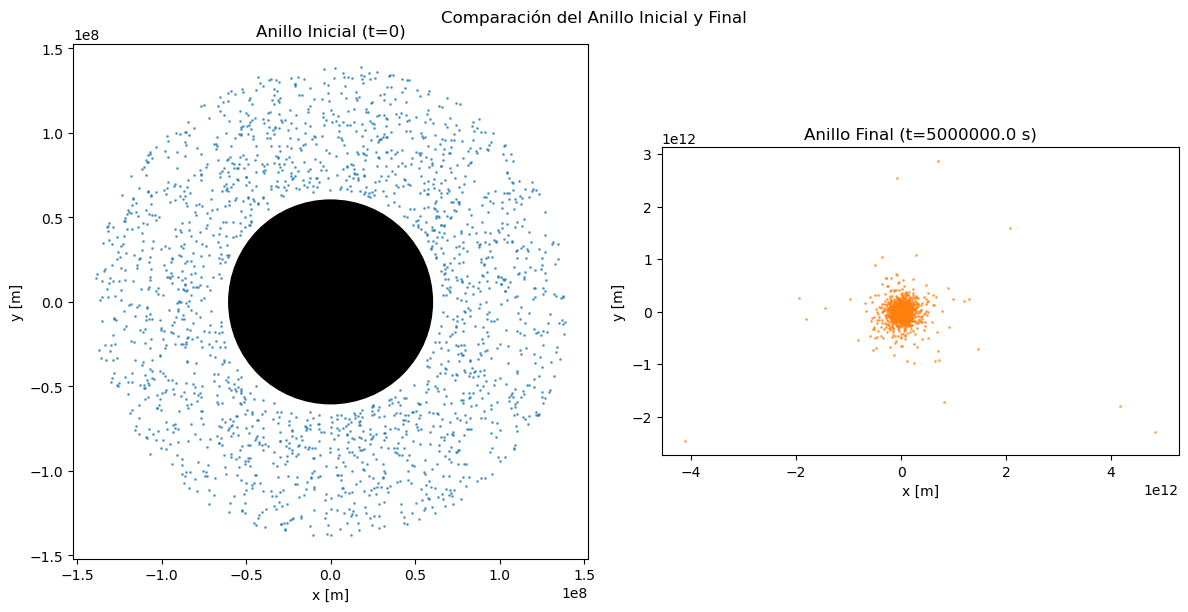

In [11]:
##ahora, gráficamos el anillo inicial vs el anillo final de la simulación
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

##Parámetros del planeta
planeta_radio = R_planet
planeta_color = 'black'

##Anillo inicial
axes[0].scatter(pos0[:,0], pos0[:,1], s=1, alpha=0.6, color='C0')
planeta0 = plt.Circle((0, 0), planeta_radio, color=planeta_color, zorder=-1)
axes[0].add_patch(planeta0)
axes[0].set_aspect('equal', 'box')
axes[0].set_title('Anillo Inicial (t=0)')
axes[0].set_xlabel('x [m]')
axes[0].set_ylabel('y [m]')

##Anillo final
axes[1].scatter(pos[:,0], pos[:,1], s=1, alpha=0.6, color='C1')
planeta1 = plt.Circle((0, 0), planeta_radio, color=planeta_color, zorder=-1)
axes[1].add_patch(planeta1)
axes[1].set_aspect('equal', 'box')
axes[1].set_title(f'Anillo Final (t={tiempos[-1]:.1f} s)')
axes[1].set_xlabel('x [m]')
axes[1].set_ylabel('y [m]')

plt.suptitle('Comparación del Anillo Inicial y Final')
plt.tight_layout()
plt.show()

Notemos que el sistema de anillos planetario que definimos no se mantiene con el tiempo, sino que gran parte del anillo es expulsado del planeta, esto lo podemos visualizar mejor si ajustamos los ejes del gráfico final.

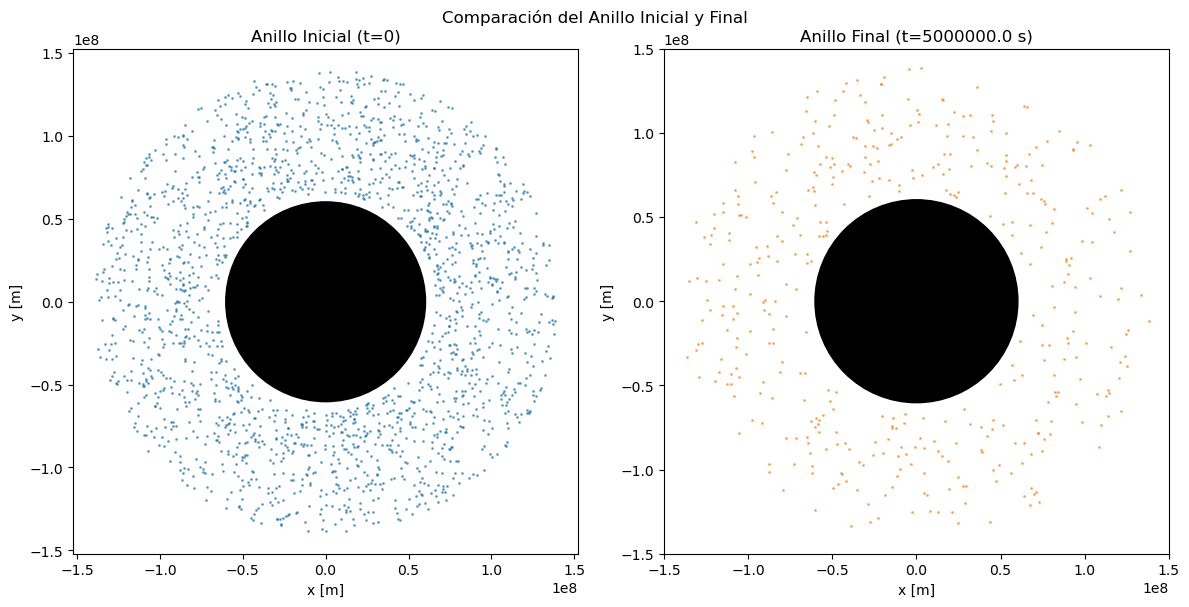

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

##Parámetros del planeta (los que ya definiste arriba)
planeta_radio = R_planet
planeta_color = 'black'

##Anillo inicial
axes[0].scatter(pos0[:,0], pos0[:,1], s=1, alpha=0.6, color='C0')
# Dibujamos el planeta como un parche Circle de radio R_planet
planeta0 = plt.Circle((0, 0), planeta_radio, color=planeta_color, zorder=-1)
axes[0].add_patch(planeta0)
axes[0].set_aspect('equal', 'box')
axes[0].set_title('Anillo Inicial (t=0)')
axes[0].set_xlabel('x [m]')
axes[0].set_ylabel('y [m]')

##Anillo final
axes[1].scatter(pos[:,0], pos[:,1], s=1, alpha=0.6, color='C1')
planeta1 = plt.Circle((0, 0), planeta_radio, color=planeta_color, zorder=-1)
axes[1].add_patch(planeta1)
axes[1].set_xlim(-1.5e8, 1.5e8), axes[1].set_ylim(-1.5e8, 1.5e8) ##Ajustamos límites de los ejes
axes[1].set_aspect('equal', 'box')
axes[1].set_title(f'Anillo Final (t={tiempos[-1]:.1f} s)')
axes[1].set_xlabel('x [m]')
axes[1].set_ylabel('y [m]')

plt.suptitle('Comparación del Anillo Inicial y Final')
plt.tight_layout()
plt.show()

Podemos apreciar un poco mejor que la mayoría de las partículas que conformaban el anillo en esta distribución radial se salieron del propio anillo, algunas alejandose del planeta mientras que otras caían a su interior. Esto lo podemos visualizar mejor si calculamos la diferencia porcentual entre los radios de cada partícula en su estado inicial y final de la simulación.

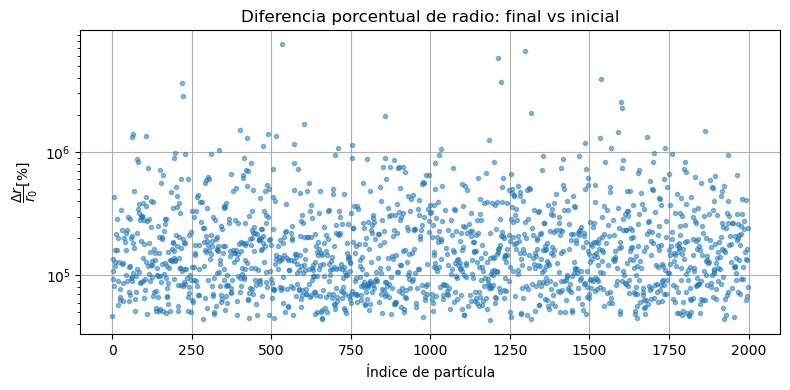

In [13]:
##Diferencia porcentual de radios
radios0 = np.linalg.norm(pos0, axis=1)   ##Radios iniciales
radios_f = np.linalg.norm(pos,  axis=1)  ##Radios finales

##Calculamos la diferencia porcentual
delta_p = 100.0 * (radios_f - radios0) / radios0

##Gráfica de las diferencias relativas
plt.figure(figsize=(8,4))
plt.plot(delta_p, marker='.', linestyle='none', alpha=0.5)
plt.yscale('log')
plt.xlabel('Índice de partícula')
plt.ylabel(r'$\dfrac{\Delta r}{r_0}[\%]$')
plt.title('Diferencia porcentual de radio: final vs inicial')
plt.grid()
plt.tight_layout()
plt.show()

Esta diferencia nos indica que existen partículas que se alejan a escalas gigantescas de su posición inicial, la mayoría hasta de un $1\times 10^6$%, destruyendo el anillo planetario.

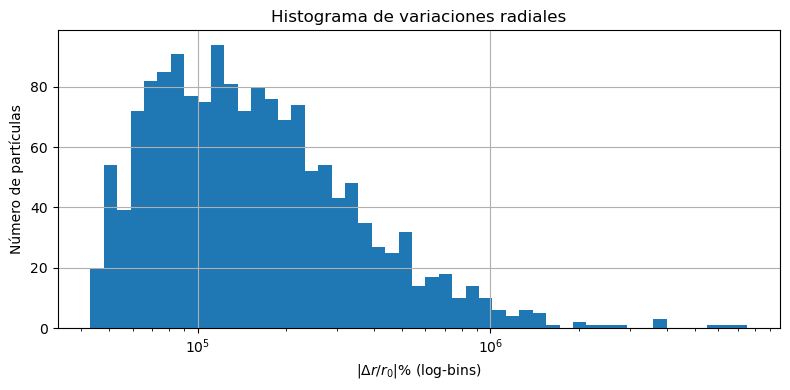

In [14]:
##Histograma en escala logarítmica de ejes
plt.figure(figsize=(8,4))
##excluimos ceros o negativos para log-histogram
vals = np.abs(delta_p[delta_p > 0])
plt.hist(vals, bins=np.logspace(np.log10(vals.min()), np.log10(vals.max()), 50))
plt.xscale('log')
plt.xlabel(r'$|\Delta r / r_0|\%$ (log‑bins)')
plt.ylabel('Número de partículas')
plt.title('Histograma de variaciones radiales')
plt.grid()
plt.tight_layout()
plt.show()

Finalmente, el histograma nos dice más de lo mismo, en este caso, que la mayoría de partículas que conformaban el anillo planetario en un inicio, modificarón su radio hasta un $10^5$% de su radio original, destruyendo por completo la órbita del planeta.

### Órbita estable

Anteriormente, habíamos gráficado un anillo de grosor unidimensional y verificamos que era estable con el tiempo. Sin embargo, al introducir una distribución de densidad radial de partículas dentro de un intervalo $[r_{in}\text{, } r_{out}]$, verificamos que era muy difícil obtener un anillo que se mantuviera estable con el tiempo, es decir, obteníamos anillos que con el pasar del tiempo se deshacían cayendo hacía el planeta o alejandose de él. Sin embargo, si observamos el mismo sistema desde un marco inercial y no desde el marco corrotante, podríamos conseguir un anillo estable durante el tiempo con relativa facilidad. 

En el sistema inercial, la única fuerza que actúa sobre cada partícula de masa despreciable en el anillo es la gravitatoria del planeta (masa $M$ y constante $G$), por lo que, la posición de la i-ésima partícula $\vec r_i(t)$ satisface la ecuación:
$$
\ddot r_i(t)=-\ \dfrac{G\ M}{r_i^3}\ \vec r
$$

En componentes cartesianas, para cada partícula,
$$
\ddot x_i(t)=-\ \dfrac{G\ M}{\left(x^2+y^2 \right)^{3/2}}\ x_i
$$
$$
\ddot y_i(t)=-\ \dfrac{G\ M}{\left(x^2+y^2 \right)^{3/2}}\ y_i
$$

Estas dos ecuaciones de segundo orden que vamos a integrar numéricamente con Leapfrog.

In [15]:
##Recuperamos las funciones
def paso_leapfrog_inercial(posiciones, velocidades, dt):
    ##Drift medio. Avanzamos posiciones medio paso
    pos_mid = posiciones + 0.5 * dt * velocidades

    ##Calculamos aceleración gravitatoria en pos_mid
    radios_mid = np.linalg.norm(pos_mid, axis=1) ##|r_mid|
    a_mid = -G * M * pos_mid / (radios_mid[:, None]**3)  ##a = -GM·r_mid/|r_mid|^3

    ##Kick completo. Actualizamos velocidades un paso dt
    vel_new = velocidades + dt * a_mid

    ##Drift medio final. Avanzamos posiciones otro medio paso
    pos_new = pos_mid + 0.5 * dt * vel_new

    return pos_new, vel_new


def energia_inercial(pos, vel, G, M):
    ##Energía cinética
    T = 0.5 * np.sum(np.linalg.norm(vel, axis=1)**2)
    ##Energía potencial gravitatoria
    radios = np.linalg.norm(pos, axis=1)
    U = -G * M * np.sum(1.0 / radios)
    return T + U

##Función para verificar que la órbita inicial del anillo sea más grande que el radio del planeta
def ver_orbita(r_int, r_ext, r_p):
    if r_int <= r_p:
        raise ValueError(f"El radio interior del anillo (r_in={r_int:e} m) "
                         f"debe ser mayor que el radio del planeta "
                         f"(R_planet={r_p:e} m).")
    elif r_int>r_ext:
        raise ValueError(f"El radio interior del anillo (r_in={r_int:e} m) "
                         f"debe ser menor que el radio exterior del anillo "
                         f"(R_planet={r_ext:e} m).")
    else:
        print("Órbitas correctas.")

In [16]:
##Parametros del sistema
G = 6.67430e-11       ##Constante de gravitación universal [m^3 kg^-1 s^-2]
M = 5.683e26          ##Masa de Saturno [kg]
R_planeta = 6.0268e7  ##Radio de Saturno [m]

##Límites del anillo planetario
r_in  = 6.6e7         ##Radio interior del anillo [m]
r_out = 1.4e8         ##Radio exterior del anillo [m]

##Número de partículas a simular
N = 2000

##Verificamos que el anillo quede fuera del planeta
ver_orbita(r_in, r_out, R_planeta)

##Semilla para reproducibilidad del muestreo aleatorio
np.random.seed(24)

##Condiciones iniciales en el sistema inercial
##Muestreo radial y angular uniforme
radios = np.random.uniform(r_in, r_out, size=N)    ##Radios entre r_in y r_out
thetas = np.random.uniform(0, 2*np.pi,   size=N)   ##Ángulos entre 0 y 2π

##Conversión a coordenadas cartesianas
x = radios * np.cos(thetas)  ##Coordenada x = r · cos(θ)
y = radios * np.sin(thetas)  ##Coordenada y = r · sin(θ)
pos = np.column_stack([x, y])  ##Array de forma (N,2) con [x_i, y_i]

##Velocidades circulares en el sistema inercial
##v = √(GM/r) en dirección tangencial (-sinθ, cosθ)
v_circ = np.sqrt(G * M / radios)      ##Módulo de la velocidad circular
vx = -v_circ * np.sin(thetas)     ##Componente x = -v·sin(θ)
vy =  v_circ * np.cos(thetas)     ##Componente y =  v·cos(θ)
vel = np.column_stack([vx, vy])    ##Array de forma (N,2) con [vx_i, vy_i]

##Parametros de integración
dt = 1e3      ##Paso de tiempo [s]
t_max  = 365*24*3600    ##Duración total de la simulación [s]
##Definimos cada cuántos pasos guardamos
save_interval = 1
n_steps = int(np.ceil(t_max / dt)) ##Número de pasos
n_saves = n_steps // save_interval + 1
energias  = np.zeros(n_saves)

##Preparamos el array de tiempos
tiempos = np.zeros(n_saves)
 
t = 0.0
tiempos[0] = t
energias[0] = energia_inercial(pos, vel, G, M)
idx = 1

##Bucle de integración, guardando tiempos
for paso in range(1, n_steps+1):
    pos, vel = paso_leapfrog_inercial(pos, vel, dt)
    t += dt

    if paso % save_interval == 0:
        tiempos[idx] = t
        energias[idx] = energia_inercial(pos, vel, G, M)
        idx += 1

print('Simulación terminada')

Órbitas correctas.
Simulación terminada


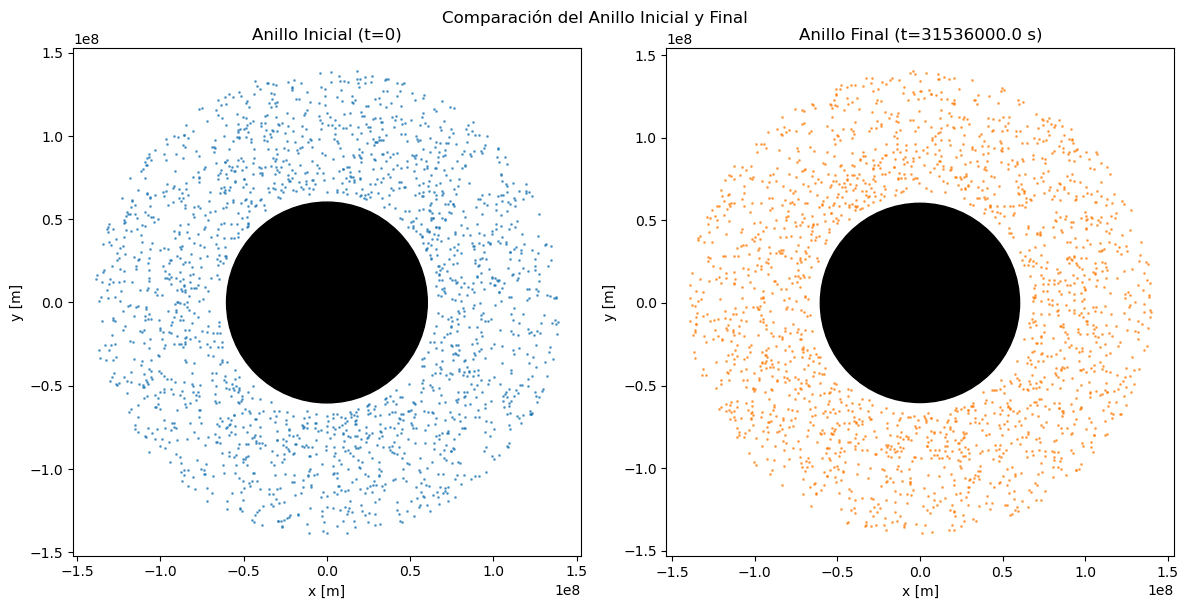

In [17]:
##Ahora, gráficamos el anillo inicial vs el anillo final de la simulación
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

##Parámetros del planeta
planeta_radio = R_planet
planeta_color = 'black'

##Anillo inicial
axes[0].scatter(pos0[:,0], pos0[:,1], s=1, alpha=0.6, color='C0')
planeta0 = plt.Circle((0, 0), planeta_radio, color=planeta_color, zorder=-1)
axes[0].add_patch(planeta0)
axes[0].set_aspect('equal', 'box')
axes[0].set_title('Anillo Inicial (t=0)')
axes[0].set_xlabel('x [m]')
axes[0].set_ylabel('y [m]')

##Anillo final
axes[1].scatter(pos[:,0], pos[:,1], s=1, alpha=0.6, color='C1')
planeta1 = plt.Circle((0, 0), planeta_radio, color=planeta_color, zorder=-1)
axes[1].add_patch(planeta1)
axes[1].set_aspect('equal', 'box')
axes[1].set_title(f'Anillo Final (t={tiempos[-1]:.1f} s)')
axes[1].set_xlabel('x [m]')
axes[1].set_ylabel('y [m]')

plt.suptitle('Comparación del Anillo Inicial y Final')
plt.tight_layout()
plt.show()

Notemos que ahora sí obtenemos una órbita que se ve estable, al menos durante el primer año de simulación. Podemos observar un desplazamiento con respecto a las partículas que conforman el anillo y una posible redestribución, para ello, veamos que que la diferencia porcentual de los radios inicial y final de cada partícula.

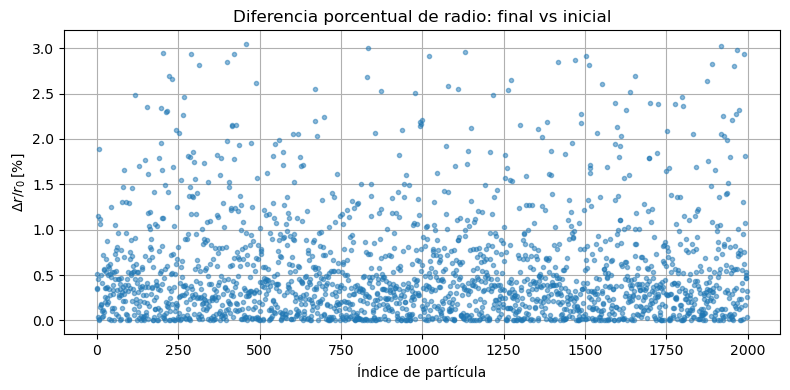

In [18]:
##Diferencia porcentual de radios
radios0 = np.linalg.norm(pos0, axis=1)
radios_f = np.linalg.norm(pos, axis=1)
delta_p = 100.0 * (radios_f - radios0) / radios0

plt.figure(figsize=(8,4))
plt.plot(delta_p, marker='.', linestyle='none', alpha=0.5)
plt.xlabel('Índice de partícula')
plt.ylabel(r'$\Delta r / r_0\,[\%]$')
plt.title('Diferencia porcentual de radio: final vs inicial')
plt.grid()
plt.tight_layout()
plt.show()

Notemos que la mayoría de las partículas solo tuvieron una variación de su órbita menor al $3$%, esto se aplica para cada una de las órbitas intermedias del anillo y no solo para sus extremos, lo que significa que tienen más oportunidades de quedarse dentro del anillo y formar uno estable. El histograma de la variación radial nos mostrará que la mayoría de las partículas dentro del anillo apenas variaron sus órbitas a través del año de simulación, lo que provoca que el anillo sea estable durante ese periodo de tiempo.

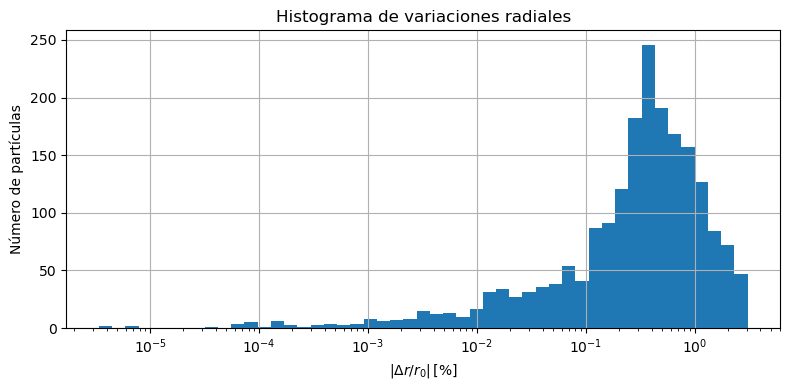

In [19]:
##Histograma de variaciones radial
vals = np.abs(delta_p[delta_p > 0])
plt.figure(figsize=(8,4))
plt.hist(vals, bins=np.logspace(np.log10(vals.min()), np.log10(vals.max()), 50))
plt.xscale('log')
plt.xlabel(r'$|\Delta r / r_0|\,[\%]$')
plt.ylabel('Número de partículas')
plt.title('Histograma de variaciones radiales')
plt.grid()
plt.tight_layout()
plt.show()

Por último, comprobemos la conservación de la energía en nuestro sistema ya que, al no tener ninguna fuerza externa que disipe o contribuya con energía, el anillo debería ser capaz de conservarla. En la gráfica deberíamos ver como la energía oscila alrededor del cero o, más específicamente, se mantiene muy cercana al cero sin llegar a cerlo, estas pequeñas variaciones son generadas por los pequeños errores acumulados al calcular la energía en cada paso $dt$ de la simulación.

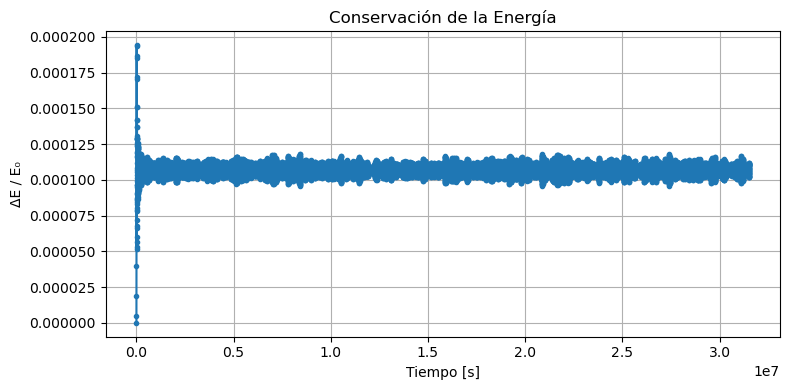

In [20]:
##Graficamos las energías de la simulación
E0 = energias[0]
deltaE = (energias - E0) / abs(E0)  # variación relativa

plt.figure(figsize=(8,4))
plt.plot(tiempos, deltaE, marker='.', linestyle='-')
plt.xlabel('Tiempo [s]')
plt.ylabel('ΔE / E₀')
plt.title('Conservación de la Energía')
plt.grid()
plt.tight_layout()
plt.show()

## Ley de Potencia para la Distribución Radial

### Teoría

En muchos discos y anillos planetarios, la densidad superficial $\sum (r)$ decrece siguiendo una ley de potencia:
$$
\sum (r)\propto r^{-p} \ \ \ \text{con exponente } p>0
$$

Esto significa que hay más material cerca del planeta y menos a grandes radios. 

Entonces, como queremos muestrear radios  $r$ de forma que la densidad superficial siga la proporción anterior, la probabilidad de encontrar una partícula entre  $r$ y $r+dr$ no es $\sum(r) dr$, sino que, al trabajar en coordenadas polares, la Función de Densidad de Probabilidad (PDF) radial viene dada por:
$$
f(r)=\dfrac{2\pi\ r\ \sum(r)}{\int_{r_{in}}^{r_{out}}2\pi\ r\ \sum(r)dr} \propto r\cdot r^{-p}=r^{1-p}
$$

Por lo que, la Función de Distribución Acumulada (CDF) correspondiente es:
$$
F(r)=\int_{r_{in}}^{r} f(r')dr' \propto \int_{r_{in}}^{r} r'^{1-p}dr'=\dfrac{r^{2-p}-r_{in}^{2-p}}{2-p} \ \ \text{para } p\neq 2
$$

Para normalizar, dividimos por el mismo valor evaluado en $r_{out}$:
$$
F(r)=\dfrac{r^{2-p}-r_{in}^{2-p}}{r_{out}^{2-p}-r_{in}^{2-p}}\text{,} \ \ \  F(r_{in})=0\ \ \  \text{y} \ \ \ F(r_{out})=1
$$

Para resolver un $r$ con esa distribución, tomamos un número aleatorio $u\sim U(0\text{, }1)$ y resolvemos:
$$
u=F(u) \ \ \ \Longrightarrow \ \ \ u=\dfrac{r^{2-p}-r_{in}^{2-p}}{r_{out}^{2-p}-r_{in}^{2-p}}
$$

de donde:
$$
r^{2-p}=u\left(r_{out}^{2-p}-r_{in}^{2-p} \right)+r_{in}^{2-p} \ \ \ \Longrightarrow \ \ \ r=\left[u\left(r_{out}^{2-p}-r_{in}^{2-p} \right)+r_{in}^{2-p} \right]^{\frac{1}{2-p}}
$$

De esta manera, cada vez que se genera una $u$ uniforme, su imagen $r$ sigue exactamente la PDF $f(r)\propto r^{1-p}$

Tenemos un caso especial cuando $p=2$ pues la integral $\int r^{-1}dr=\ln{r}$. En este caso la CDF y su inversa son:
$$
F(r)=\dfrac{\text{ln}\left(\dfrac{r}{r_{in}} \right)}{\text{ln}\left(\dfrac{r_{out}}{r_{in}} \right)} \ \ \ \Longrightarrow \ \ \ r=r_{in} \left(\dfrac{r_{out}}{r_{in}} \right)^u
$$

In [21]:
##Definimos una función para muestrear radios según ley de potencia
def sample_powerlaw(r_in, r_out, N, p):
    ##Caso p=2
    if abs(p - 2.0) < 1e-6:
        u = np.random.rand(N)
        ##Invertimos CDF
        return r_in * (r_out/r_in)**u
    ##Caso p≠2:
    coef_in = r_in**(2.0 - p)
    coef_out = r_out**(2.0 - p)
    u = np.random.rand(N)  ##uniformes en [0,1)
    ##invertimos CDF
    radios   = (u * (coef_out - coef_in) + coef_in)**(1.0 / (2.0 - p))
    return radios

### Órbita con $p=1.5$

In [22]:
##Parámetros físicos
G = 6.67430e-11 ##Constante de gravitación [m^3 kg^-1 s^-2]
M = 5.683e26 ##Masa del planeta [kg]
R_planeta = 6.0268e7  ##Radio del planeta [m]

r_in, r_out = 6.6e7, 1.4e8 ##radios interior/exterior [m]
##Verificamos órbitas
ver_orbita(r_in, r_out, R_planeta) 

N = 2000   ##Número de partículas que conforman al anillo
np.random.seed(24) ##Reproducibilidad del mismo modelo

##Muestreo de radios según ley de potencia con exponente p
p = 1.5 ##Exponente de la ley de potencia
radios = sample_powerlaw(r_in, r_out, N, p)
##Muestreo angular uniforme
thetas = np.random.uniform(0, 2*np.pi, size=N)

##Conversión a coordenadas cartesianas
x = radios * np.cos(thetas)  
y = radios * np.sin(thetas)
pos = np.column_stack([x, y])   ##Posiciones iniciales

##Velocidades circulares inerciales
## v_circ = √(G M / r) en dirección tangencial (-sinθ, cosθ)
v_circ = np.sqrt(G * M / radios)
vx = -v_circ * np.sin(thetas)
vy =  v_circ * np.cos(thetas)
vel = np.column_stack([vx, vy])  ##Velocidades iniciales


##Parametros de integración
dt = 1e3   ##paso de tiempo [s]
t_max = 365*24*3600 ##1 año
n_steps = int(np.ceil(t_max / dt)) ##Número de pasos
save_interval = 1 ##Guardamos cada 1 paso

n_saves = n_steps // save_interval + 1
tiempos = np.zeros(n_saves)
energias = np.zeros(n_saves)

##Inicialización de tiempo y energía
t = 0.0
tiempos[0]  = t
energias[0] = energia_inercial(pos, vel, G, M)

##Bucle de integración
idx = 1
for paso in range(1, n_steps+1):
    pos, vel = paso_leapfrog_inercial(pos, vel, dt)
    t += dt

    if paso % save_interval == 0:
        tiempos[idx]  = t
        energias[idx] = energia_inercial(pos, vel, G, M)
        idx += 1

print(f"Simulación completada.")

Órbitas correctas.
Simulación completada.


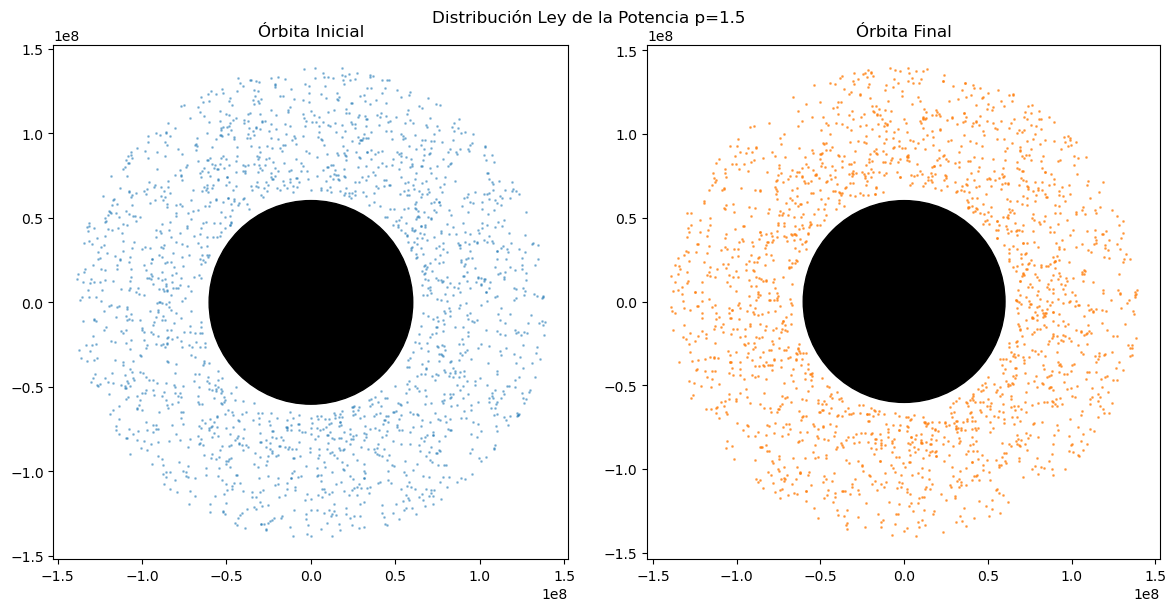

In [23]:
##Ahora, gráficamos el anillo inicial vs el anillo final de la simulación
fig, axs = plt.subplots(1, 2, figsize=(12,6))

##Anillo inicial
axs[0].scatter(pos0[:,0], pos0[:,1], s=1, alpha=0.4, color='C0')
axs[0].add_patch(plt.Circle((0,0), R_planeta, color='black'))
axs[0].set_aspect('equal'); axs[0].set_title('Órbita Inicial')
##Anillo final
axs[1].scatter(pos[:,0], pos[:,1], s=1, alpha=0.6, color='C1')
axs[1].add_patch(plt.Circle((0,0), R_planeta, color='black'))
axs[1].set_aspect('equal'); axs[1].set_title('Órbita Final')

plt.suptitle(f'Distribución Ley de la Potencia p={p}')
plt.tight_layout()
plt.show()

A simple vista podemos apreciar un desplazamiento de las partículas más exteriores al planeta a radios más cercanos, sin embargo, notemos que las partículas no caen al planeta sino que mantienen un anillo estable alrededor de él.

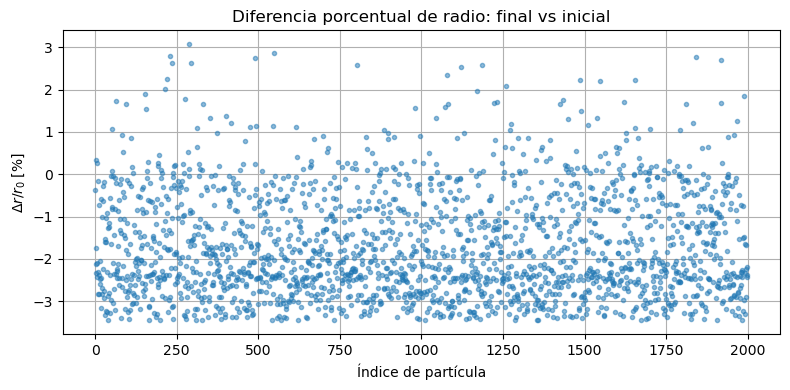

In [24]:
##Diferencia porcentual de radios
radios0 = np.linalg.norm(pos0, axis=1)
radios_f= np.linalg.norm(pos,  axis=1)
delta_p = 100.0 * (radios_f - radios0) / radios0

plt.figure(figsize=(8,4))
plt.plot(delta_p, '.', alpha=0.5)
plt.xlabel('Índice de partícula')
plt.ylabel(r'$\Delta r / r_0\;[\%]$')
plt.title('Diferencia porcentual de radio: final vs inicial')
plt.grid()
plt.tight_layout()
plt.show()

En la gráfica de la diferencia porcentual de los radios de cada partícula podemos observar una tendencia de cada partícula a acercarse al planeta, tal y como dicta nuestro modelo. Aún así, muy posiblemente debido a un valor de $p=1.5$ bajo, todavía tenemos partículas que se alejaron del planeta, aunque no es la tendencia general.

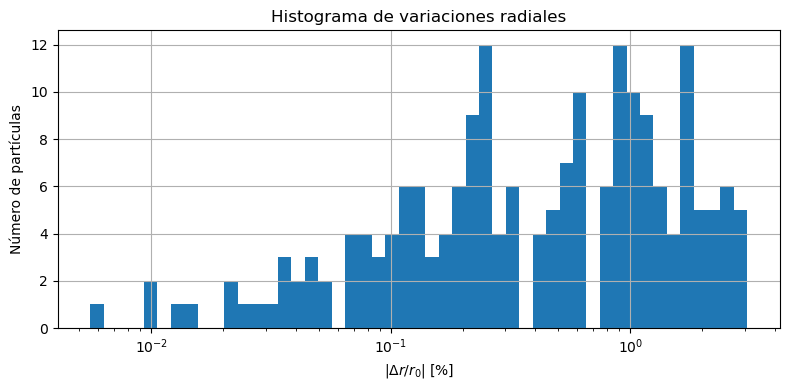

In [25]:
##Histograma de variaciones radiales
vals = np.abs(delta_p[delta_p>0])
plt.figure(figsize=(8,4))
plt.hist(vals, bins=np.logspace(np.log10(vals.min()), np.log10(vals.max()), 50))
plt.xscale('log')
plt.xlabel(r'$|\Delta r / r_0|\;[\%]$')
plt.ylabel('Número de partículas')
plt.title('Histograma de variaciones radiales')
plt.grid()
plt.tight_layout()
plt.show()

Observemos que todos estos modelos conservan la energía del sistema.

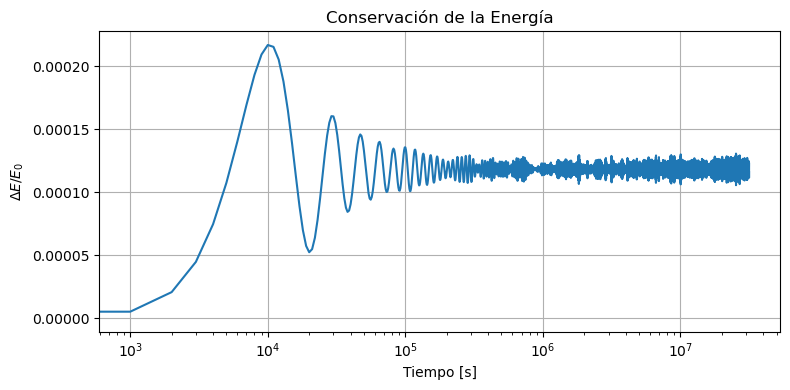

In [26]:
##Conservación de la energía
##Energía relativa ΔE/E0
E0 = energias[0]
deltaE = (energias - E0) / abs(E0)

plt.figure(figsize=(8,4))
plt.plot(tiempos, deltaE)
plt.xscale('log')
plt.xlabel('Tiempo [s]')
plt.ylabel(r'$\Delta E / E_0$')
plt.title('Conservación de la Energía')
plt.grid()
plt.tight_layout()
plt.show()

### Órbita con $p=9.3$

Ahora gráfiquemos un anillo con un valor de $p$ mayor, deberíamos poder observar como una gran parte del anmillo se acumula en las cercanías del planeta.

In [27]:
##Parámetros físicos
G = 6.67430e-11 ##Constante de gravitación [m^3 kg^-1 s^-2]
M = 5.683e26 ##Masa del planeta [kg]
R_planeta = 6.0268e7  ##Radio del planeta [m]

r_in, r_out = 6.6e7, 1.4e8 ##radios interior/exterior [m]
##Verificamos órbitas
ver_orbita(r_in, r_out, R_planeta) 

N = 2000   ##Número de partículas que conforman al anillo
np.random.seed(24) ##Reproducibilidad del mismo modelo

##Muestreo de radios según ley de potencia con exponente p
p = 9.3 ##Exponente de la ley de potencia
radios = sample_powerlaw(r_in, r_out, N, p)
##Muestreo angular uniforme
thetas = np.random.uniform(0, 2*np.pi, size=N)

##Conversión a coordenadas cartesianas
x = radios * np.cos(thetas)  
y = radios * np.sin(thetas)
pos = np.column_stack([x, y])   ##Posiciones iniciales

##Velocidades circulares inerciales
## v_circ = √(G M / r) en dirección tangencial (-sinθ, cosθ)
v_circ = np.sqrt(G * M / radios)
vx = -v_circ * np.sin(thetas)
vy =  v_circ * np.cos(thetas)
vel = np.column_stack([vx, vy])  ##Velocidades iniciales


##Parametros de integración
dt = 1e3   ##paso de tiempo [s]
t_max = 365*24*3600 ##1 año
n_steps = int(np.ceil(t_max / dt)) ##Número de pasos
save_interval = 1 ##Guardamos cada 1 paso

n_saves = n_steps // save_interval + 1
tiempos = np.zeros(n_saves)
energias = np.zeros(n_saves)

##Inicialización de tiempo y energía
t = 0.0
tiempos[0]  = t
energias[0] = energia_inercial(pos, vel, G, M)

##Bucle de integración
idx = 1
for paso in range(1, n_steps+1):
    pos, vel = paso_leapfrog_inercial(pos, vel, dt)
    t += dt

    if paso % save_interval == 0:
        tiempos[idx]  = t
        energias[idx] = energia_inercial(pos, vel, G, M)
        idx += 1

print(f"Simulación completada.")

Órbitas correctas.
Simulación completada.


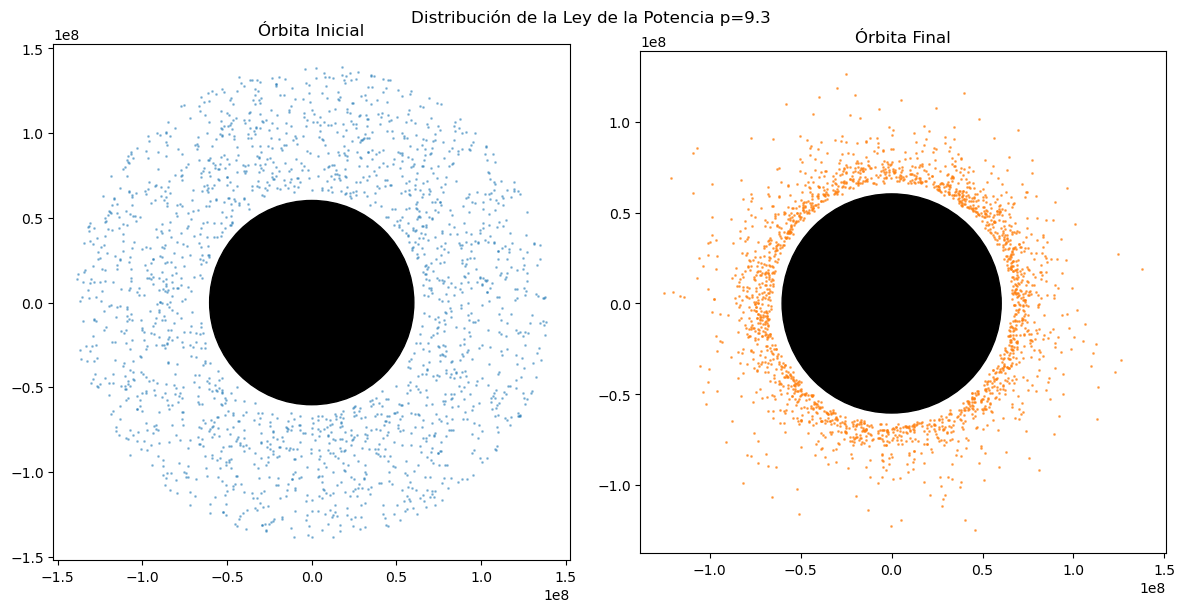

In [28]:
##Ahora, gráficamos el anillo inicial vs el anillo final de la simulación
fig, axs = plt.subplots(1, 2, figsize=(12,6))

##Anillo inicial
axs[0].scatter(pos0[:,0], pos0[:,1], s=1, alpha=0.4, color='C0')
axs[0].add_patch(plt.Circle((0,0), R_planeta, color='black'))
axs[0].set_aspect('equal'); axs[0].set_title('Órbita Inicial')
##Anillo final
axs[1].scatter(pos[:,0], pos[:,1], s=1, alpha=0.6, color='C1')
axs[1].add_patch(plt.Circle((0,0), R_planeta, color='black'))
axs[1].set_aspect('equal'); axs[1].set_title('Órbita Final')

plt.suptitle(f'Distribución de la Ley de la Potencia p={p}')
plt.tight_layout()
plt.show()

Podemos observar como la gran mayoría de partículas que conforman el anillo siguen manteniendo un anillo estable alrededor del planeta pero que se han redistribuido en orbitas mas cercanas al planeta. Esto lo podemos observar mejor en la gráfica de la diferencia porcentual, en donde notaremos de inmediato dicha tendencia.

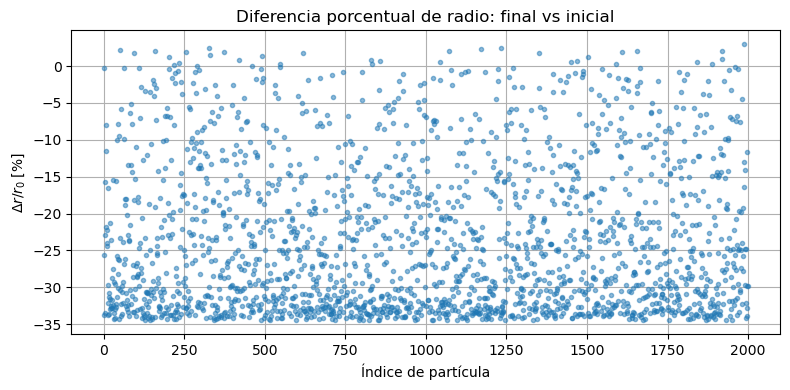

In [29]:
##Diferencia porcentual de radios
radios0 = np.linalg.norm(pos0, axis=1)
radios_f= np.linalg.norm(pos,  axis=1)
delta_p = 100.0 * (radios_f - radios0) / radios0

plt.figure(figsize=(8,4))
plt.plot(delta_p, '.', alpha=0.5)
plt.xlabel('Índice de partícula')
plt.ylabel(r'$\Delta r / r_0\;[\%]$')
plt.title('Diferencia porcentual de radio: final vs inicial')
plt.grid()
plt.tight_layout()
plt.show()

Notemos que, ahora sí, la mayoría de partículas modificaron su radio a un radio menor al que tenían acercandose al planeta pero manteniendo el anillo.

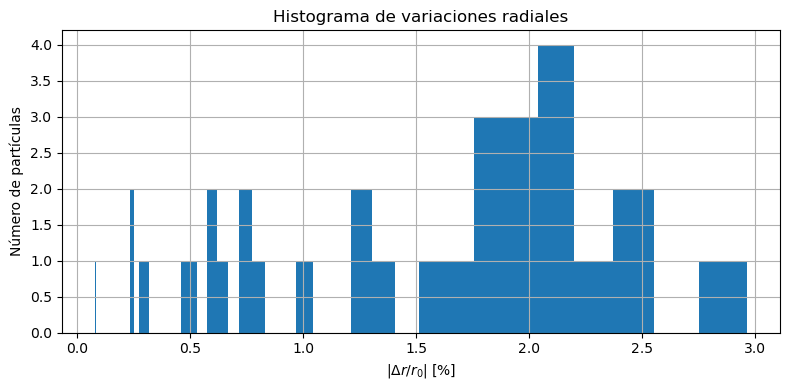

In [30]:
##Histograma de variaciones radiales
vals = np.abs(delta_p[delta_p>0])
plt.figure(figsize=(8,4))
plt.hist(vals, bins=np.logspace(np.log10(vals.min()), np.log10(vals.max()), 50))
plt.xlabel(r'$|\Delta r / r_0|\;[\%]$')
plt.ylabel('Número de partículas')
plt.title('Histograma de variaciones radiales')
plt.grid()
plt.tight_layout()
plt.show()

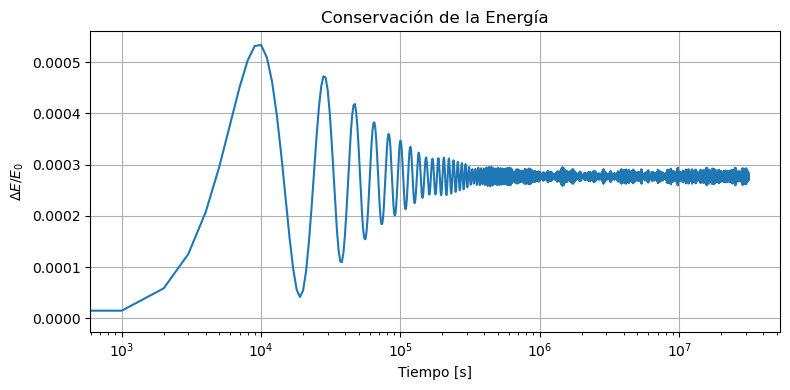

In [31]:
##Conservación de la energía
##Energía relativa ΔE/E0
E0 = energias[0]
deltaE = (energias - E0) / abs(E0)

plt.figure(figsize=(8,4))
plt.plot(tiempos, deltaE)
plt.xscale('log')
plt.xlabel('Tiempo [s]')
plt.ylabel(r'$\Delta E / E_0$')
plt.title('Conservación de la Energía')
plt.grid()
plt.tight_layout()
plt.show()

### Órbita con $p=2.0$

In [32]:
##Parámetros físicos
G = 6.67430e-11 ##Constante de gravitación [m^3 kg^-1 s^-2]
M = 5.683e26 ##Masa del planeta [kg]
R_planeta = 6.0268e7  ##Radio del planeta [m]

r_in, r_out = 6.6e7, 1.4e8 ##radios interior/exterior [m]
##Verificamos órbitas
ver_orbita(r_in, r_out, R_planeta) 

N = 2000   ##Número de partículas que conforman al anillo
np.random.seed(24) ##Reproducibilidad del mismo modelo

##Muestreo de radios según ley de potencia con exponente p
p = 2.0 ##Exponente de la ley de potencia
radios = sample_powerlaw(r_in, r_out, N, p)
##Muestreo angular uniforme
thetas = np.random.uniform(0, 2*np.pi, size=N)

##Conversión a coordenadas cartesianas
x = radios * np.cos(thetas)  
y = radios * np.sin(thetas)
pos = np.column_stack([x, y])   ##Posiciones iniciales

##Velocidades circulares inerciales
## v_circ = √(G M / r) en dirección tangencial (-sinθ, cosθ)
v_circ = np.sqrt(G * M / radios)
vx = -v_circ * np.sin(thetas)
vy =  v_circ * np.cos(thetas)
vel = np.column_stack([vx, vy])  ##Velocidades iniciales


##Parametros de integración
dt = 1e3   ##paso de tiempo [s]
t_max = 365*24*3600 ##1 año
n_steps = int(np.ceil(t_max / dt)) ##Número de pasos
save_interval = 1 ##Guardamos cada 1 paso

n_saves = n_steps // save_interval + 1
tiempos = np.zeros(n_saves)
energias = np.zeros(n_saves)

##Inicialización de tiempo y energía
t = 0.0
tiempos[0]  = t
energias[0] = energia_inercial(pos, vel, G, M)

##Bucle de integración
idx = 1
for paso in range(1, n_steps+1):
    pos, vel = paso_leapfrog_inercial(pos, vel, dt)
    t += dt

    if paso % save_interval == 0:
        tiempos[idx]  = t
        energias[idx] = energia_inercial(pos, vel, G, M)
        idx += 1

print(f"Simulación completada.")

Órbitas correctas.
Simulación completada.


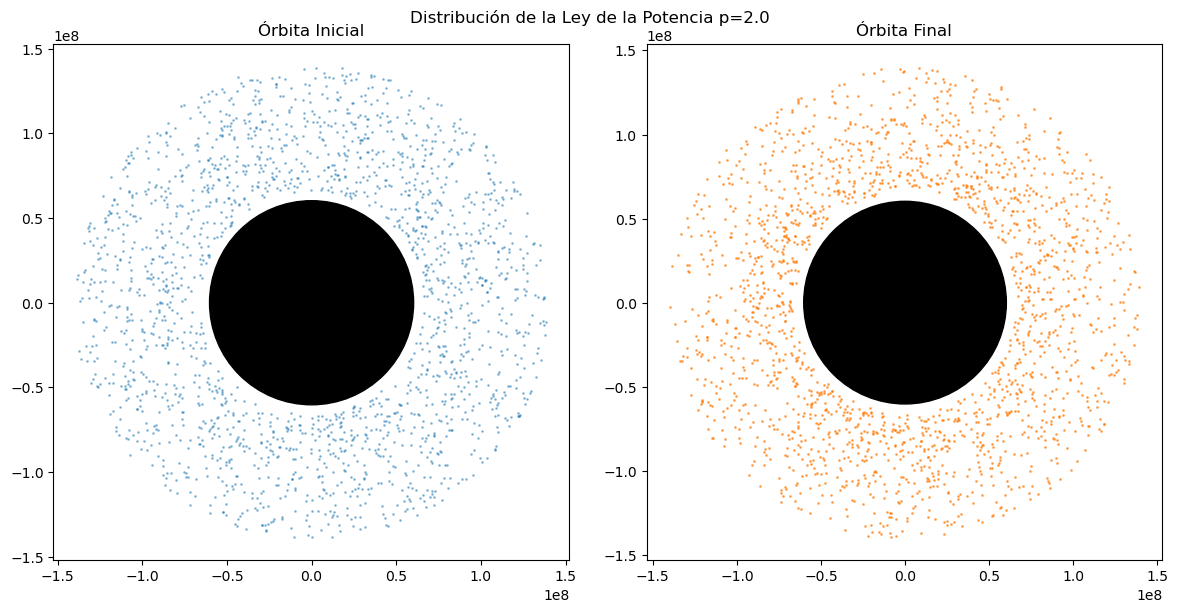

In [33]:
##Ahora, gráficamos el anillo inicial vs el anillo final de la simulación
fig, axs = plt.subplots(1, 2, figsize=(12,6))

##Anillo inicial
axs[0].scatter(pos0[:,0], pos0[:,1], s=1, alpha=0.4, color='C0')
axs[0].add_patch(plt.Circle((0,0), R_planeta, color='black'))
axs[0].set_aspect('equal'); axs[0].set_title('Órbita Inicial')
##Anillo final
axs[1].scatter(pos[:,0], pos[:,1], s=1, alpha=0.6, color='C1')
axs[1].add_patch(plt.Circle((0,0), R_planeta, color='black'))
axs[1].set_aspect('equal'); axs[1].set_title('Órbita Final')

plt.suptitle(f'Distribución de la Ley de la Potencia p={p}')
plt.tight_layout()
plt.show()

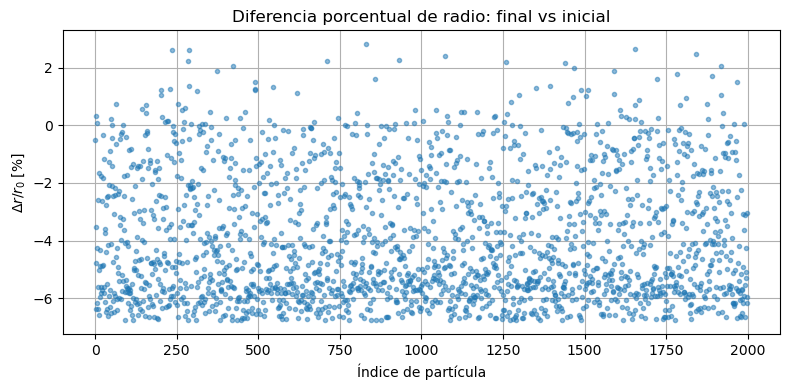

In [34]:
##Diferencia porcentual de radios
radios0 = np.linalg.norm(pos0, axis=1)
radios_f= np.linalg.norm(pos,  axis=1)
delta_p = 100.0 * (radios_f - radios0) / radios0

plt.figure(figsize=(8,4))
plt.plot(delta_p, '.', alpha=0.5)
plt.xlabel('Índice de partícula')
plt.ylabel(r'$\Delta r / r_0\;[\%]$')
plt.title('Diferencia porcentual de radio: final vs inicial')
plt.grid()
plt.tight_layout()
plt.show()

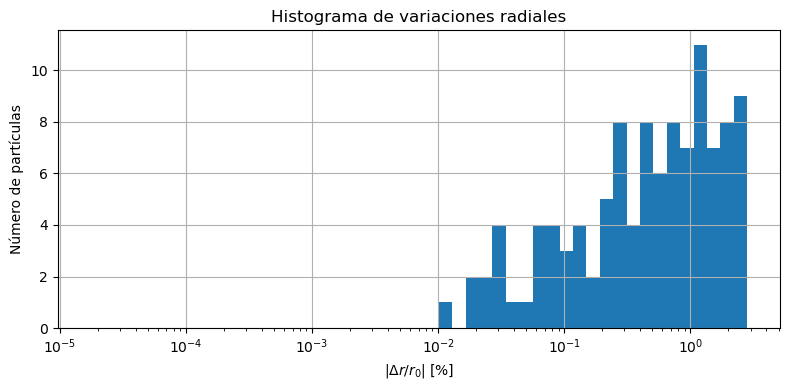

In [35]:
##Histograma de variaciones radiales
vals = np.abs(delta_p[delta_p>0])
plt.figure(figsize=(8,4))
plt.hist(vals, bins=np.logspace(np.log10(vals.min()), np.log10(vals.max()), 50))
plt.xscale('log')
plt.xlabel(r'$|\Delta r / r_0|\;[\%]$')
plt.ylabel('Número de partículas')
plt.title('Histograma de variaciones radiales')
plt.grid()
plt.tight_layout()
plt.show()

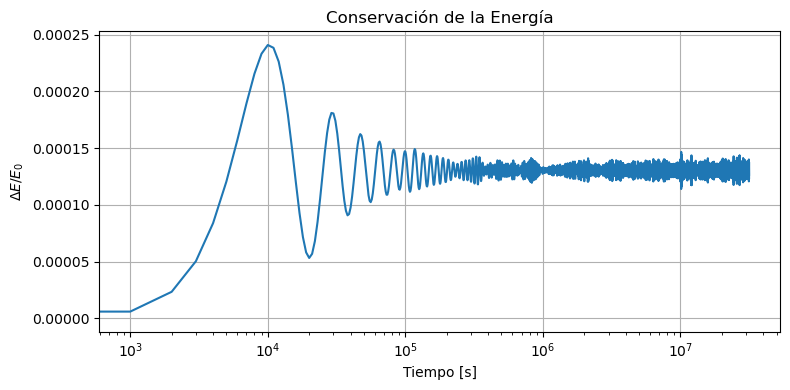

In [36]:
##Conservación de la energía
##Energía relativa ΔE/E0
E0 = energias[0]
deltaE = (energias - E0) / abs(E0)

plt.figure(figsize=(8,4))
plt.plot(tiempos, deltaE)
plt.xscale('log')
plt.xlabel('Tiempo [s]')
plt.ylabel(r'$\Delta E / E_0$')
plt.title('Conservación de la Energía')
plt.grid()
plt.tight_layout()
plt.show()

## Anillo Gaussiano

### Teoría

Un anillo gaussiano concentra la masa alrededor de un radio característico $r_0$ con una dispersión $\sigma$. Su densidad superficial sigue la siguiente expresión:
$$
\sum(r) \propto \text{exp}\left[-\ \dfrac{(r-r_0)^2}{2\sigma^2} \right]
$$

Para muestrear radios en el intervalo $[r_{in}\text{, } r_{out}]$ con esa distribución, podemos usar muestreo por rechazo, generando candidatos uniformes y aceptándolos con probabilidad proporcional a la PDF gaussiana local.

In [37]:
##Definamos la función para el anillo gaussiano a través de un muestreo por rechazo 
def sample_gaussian_ring(r_in, r_out, N, r0, sigma):
    samples = []
    while len(samples) < N:
        ##candidato uniforme en [r_in, r_out]
        r_c = np.random.uniform(r_in, r_out)
        ##PDF gaussiana (sin normalizar) valor máximo = 1 en r=r0
        p_c = np.exp(-0.5*((r_c - r0)/sigma)**2)
        if np.random.rand() < p_c:
            samples.append(r_c)
    return np.array(samples)

### Órbita con $r_0=1\times10^8$ y $\sigma=1\times10^7$

In [38]:
##Parametros físicos
G = 6.67430e-11 ##Constante de gravitación [m^3 kg^-1 s^-2]
M = 5.683e26 ##Masa del planeta [kg]
R_planeta = 6.0268e7  ##Radio del planeta [m]

r_in, r_out = 6.6e7, 1.4e8 ##radios interior/exterior [m]
##Verificamos órbitas
ver_orbita(r_in, r_out, R_planeta) 

N = 2000   ##Número de partículas que conforman al anillo
np.random.seed(24) ##Reproducibilidad del mismo modelo

##Muestreo de radios gaussiano
r0 = 1.0e8 ##Radio central del pico gaussiano [m]
sigma = 1.0e7  ##Ancho del anillo [m]

##Radios distribuidos según gaussiana truncada
radios = sample_gaussian_ring(r_in, r_out, N, r0, sigma)
##Ángulos uniformes
thetas = np.random.uniform(0, 2*np.pi, size=N)

##Coordenadas cartesianas
x   = radios * np.cos(thetas)
y   = radios * np.sin(thetas)
pos = np.column_stack([x, y])  ##posiciones iniciales
pos0= pos.copy()               ##guardamos para comparar radios

##Velocidades circulares inerciales
v_circ = np.sqrt(G * M / radios)
vx     = -v_circ * np.sin(thetas)
vy     =  v_circ * np.cos(thetas)
vel    = np.column_stack([vx, vy])  ##velocidades iniciales

##Parametros de integración
dt = 1e3   ##paso de tiempo [s]
t_max = 365*24*3600 ##1 año
n_steps = int(np.ceil(t_max / dt)) ##Número de pasos
save_interval = 1 ##Guardamos cada 1 paso

##Arrays de salida: tiempos y energías
n_saves  = n_steps // save_interval + 1
tiempos  = np.zeros(n_saves)
energias = np.zeros(n_saves)

##Inicialización de tiempo y energía
t = 0.0
tiempos[0]  = t
energias[0] = energia_inercial(pos, vel, G, M)

##Bucle de integración
idx = 1
for paso in range(1, n_steps+1):
    pos, vel = paso_leapfrog_inercial(pos, vel, dt)
    t += dt
    if paso % save_interval == 0:
        tiempos[idx]  = t
        energias[idx] = energia_inercial(pos, vel, G, M)
        idx += 1

print(f"Simulación completada.")

Órbitas correctas.
Simulación completada.


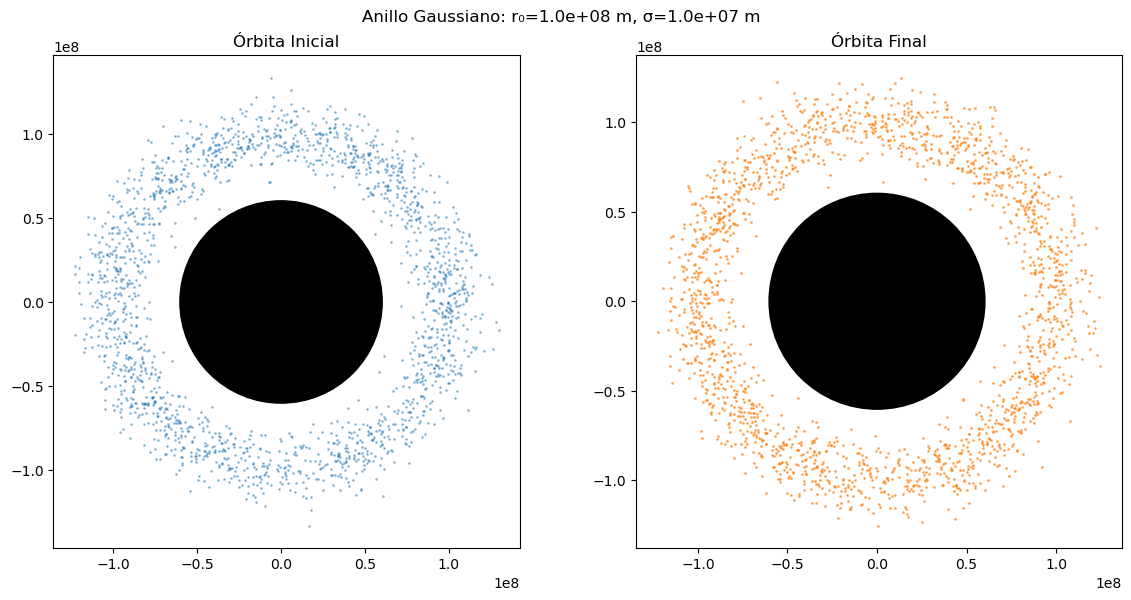

In [39]:
##Ahora, gráficamos el anillo inicial vs el anillo final de la simulación
fig, axs = plt.subplots(1, 2, figsize=(12,6))

##Anillo inicial
axs[0].scatter(pos0[:,0], pos0[:,1], s=1, alpha=0.4, color='C0')
axs[0].add_patch(plt.Circle((0,0), R_planeta, color='black'))
axs[0].set_aspect('equal'); axs[0].set_title('Órbita Inicial')
##Anillo final
axs[1].scatter(pos[:,0], pos[:,1], s=1, alpha=0.6, color='C1')
axs[1].add_patch(plt.Circle((0,0), R_planeta, color='black'))
axs[1].set_aspect('equal'); axs[1].set_title('Órbita Final')

plt.suptitle(f'Anillo Gaussiano: r₀={r0:.1e} m, σ={sigma:.1e} m')
plt.tight_layout()
plt.show()

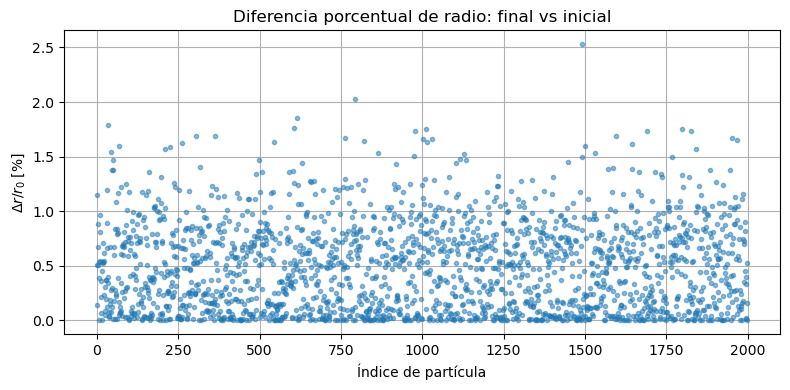

In [40]:
##Diferencia porcentual de radios
radios0 = np.linalg.norm(pos0, axis=1)
radios_f= np.linalg.norm(pos,  axis=1)
delta_p = 100.0 * (radios_f - radios0) / radios0

plt.figure(figsize=(8,4))
plt.plot(delta_p, '.', alpha=0.5)
plt.xlabel('Índice de partícula')
plt.ylabel(r'$\Delta r / r_0\;[\%]$')
plt.title('Diferencia porcentual de radio: final vs inicial')
plt.grid()
plt.tight_layout()
plt.show()

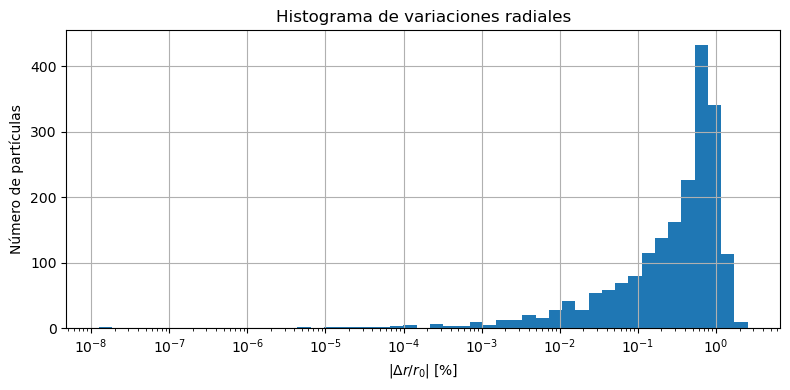

In [41]:
##Histograma de variaciones radiales
vals = np.abs(delta_p[delta_p>0])
plt.figure(figsize=(8,4))
plt.hist(vals, bins=np.logspace(np.log10(vals.min()), np.log10(vals.max()), 50))
plt.xscale('log')
plt.xlabel(r'$|\Delta r / r_0|\;[\%]$')
plt.ylabel('Número de partículas')
plt.title('Histograma de variaciones radiales')
plt.grid()
plt.tight_layout()
plt.show()

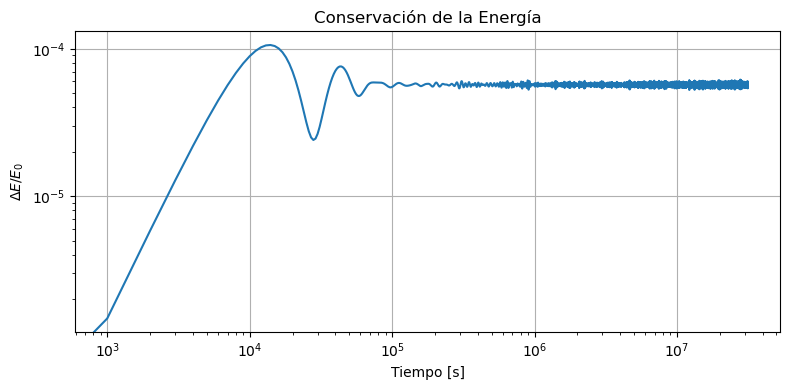

In [42]:
##Conservación de la energía
##Energía relativa ΔE/E0
E0 = energias[0]
deltaE = (energias - E0) / abs(E0)

plt.figure(figsize=(8,4))
plt.plot(tiempos, deltaE)
plt.xscale('log'), plt.yscale('log')
plt.xlabel('Tiempo [s]')
plt.ylabel(r'$\Delta E / E_0$')
plt.title('Conservación de la Energía')
plt.grid()
plt.tight_layout()
plt.show()

### Órbita con $r_0=15\times10^7$ y $\sigma=1\times10^7$

In [43]:
##Parametros físicos
G = 6.67430e-11 ##Constante de gravitación [m^3 kg^-1 s^-2]
M = 5.683e26 ##Masa del planeta [kg]
R_planeta = 6.0268e7  ##Radio del planeta [m]

r_in, r_out = 6.6e7, 1.4e8 ##radios interior/exterior [m]
##Verificamos órbitas
ver_orbita(r_in, r_out, R_planeta) 

N = 2000   ##Número de partículas que conforman al anillo
np.random.seed(24) ##Reproducibilidad del mismo modelo

##Muestreo de radios gaussiano
r0 = 15.0e7 ##Radio central del pico gaussiano [m]
sigma = 1.0e7 ##Ancho del anillo [m]

##Radios distribuidos según gaussiana truncada
radios = sample_gaussian_ring(r_in, r_out, N, r0, sigma)
##Ángulos uniformes
thetas = np.random.uniform(0, 2*np.pi, size=N)

##Coordenadas cartesianas
x   = radios * np.cos(thetas)
y   = radios * np.sin(thetas)
pos = np.column_stack([x, y])  ##posiciones iniciales
pos0= pos.copy()               ##guardamos para comparar radios

##Velocidades circulares inerciales
v_circ = np.sqrt(G * M / radios)
vx     = -v_circ * np.sin(thetas)
vy     =  v_circ * np.cos(thetas)
vel    = np.column_stack([vx, vy])  ##velocidades iniciales

##Parametros de integración
dt = 1e3   ##paso de tiempo [s]
t_max = 365*24*3600 ##1 año
n_steps = int(np.ceil(t_max / dt)) ##Número de pasos
save_interval = 1 ##Guardamos cada 1 paso

##Arrays de salida: tiempos y energías
n_saves  = n_steps // save_interval + 1
tiempos  = np.zeros(n_saves)
energias = np.zeros(n_saves)

##Inicialización de tiempo y energía
t = 0.0
tiempos[0]  = t
energias[0] = energia_inercial(pos, vel, G, M)

##Bucle de integración
idx = 1
for paso in range(1, n_steps+1):
    pos, vel = paso_leapfrog_inercial(pos, vel, dt)
    t += dt
    if paso % save_interval == 0:
        tiempos[idx]  = t
        energias[idx] = energia_inercial(pos, vel, G, M)
        idx += 1

print(f"Simulación completada.")

Órbitas correctas.
Simulación completada.


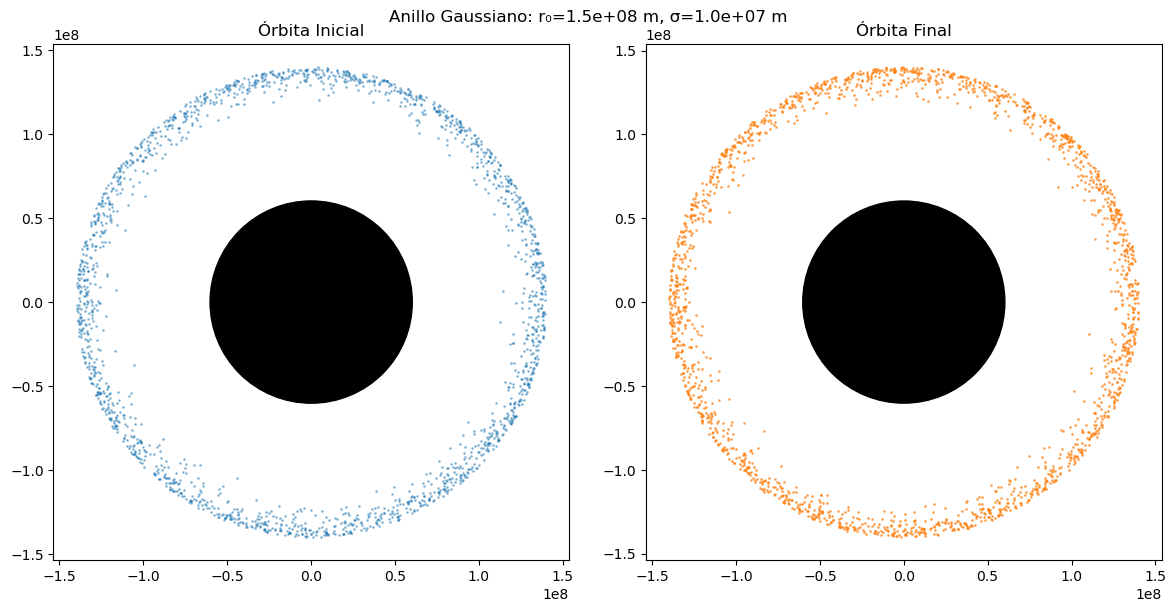

In [44]:
##Ahora, gráficamos el anillo inicial vs el anillo final de la simulación
fig, axs = plt.subplots(1, 2, figsize=(12,6))

##Anillo inicial
axs[0].scatter(pos0[:,0], pos0[:,1], s=1, alpha=0.4, color='C0')
axs[0].add_patch(plt.Circle((0,0), R_planeta, color='black'))
axs[0].set_aspect('equal'); axs[0].set_title('Órbita Inicial')
##Anillo final
axs[1].scatter(pos[:,0], pos[:,1], s=1, alpha=0.6, color='C1')
axs[1].add_patch(plt.Circle((0,0), R_planeta, color='black'))
axs[1].set_aspect('equal'); axs[1].set_title('Órbita Final')

plt.suptitle(f'Anillo Gaussiano: r₀={r0:.1e} m, σ={sigma:.1e} m')
plt.tight_layout()
plt.show()

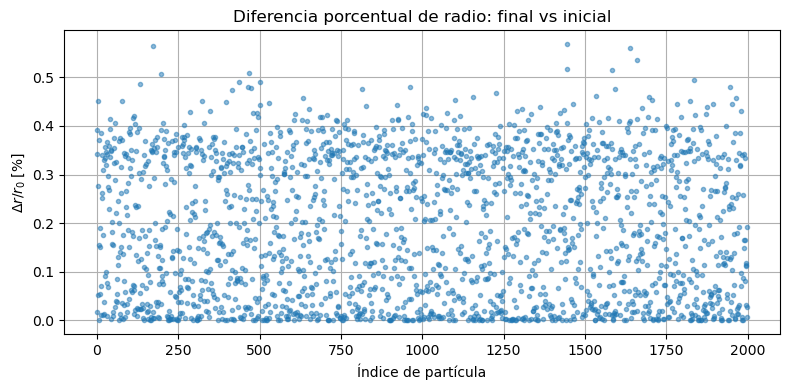

In [45]:
##Diferencia porcentual de radios
radios0 = np.linalg.norm(pos0, axis=1)
radios_f= np.linalg.norm(pos,  axis=1)
delta_p = 100.0 * (radios_f - radios0) / radios0

plt.figure(figsize=(8,4))
plt.plot(delta_p, '.', alpha=0.5)
plt.xlabel('Índice de partícula')
plt.ylabel(r'$\Delta r / r_0\;[\%]$')
plt.title('Diferencia porcentual de radio: final vs inicial')
plt.grid()
plt.tight_layout()
plt.show()

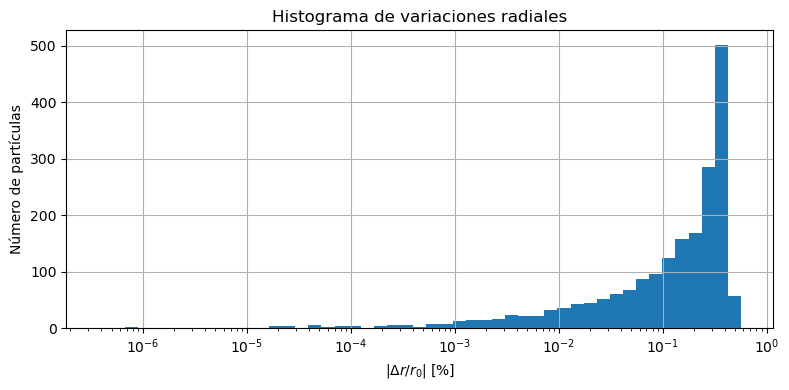

In [46]:
##Histograma de variaciones radiales
vals = np.abs(delta_p[delta_p>0])
plt.figure(figsize=(8,4))
plt.hist(vals, bins=np.logspace(np.log10(vals.min()), np.log10(vals.max()), 50))
plt.xscale('log')
plt.xlabel(r'$|\Delta r / r_0|\;[\%]$')
plt.ylabel('Número de partículas')
plt.title('Histograma de variaciones radiales')
plt.grid()
plt.tight_layout()
plt.show()

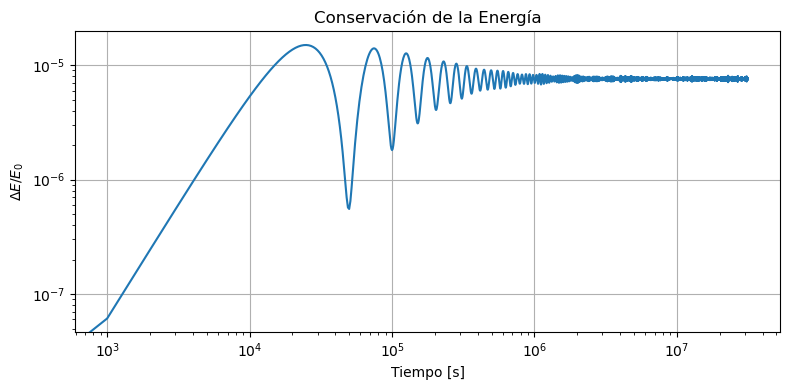

In [47]:
##Conservación de la energía
##Energía relativa ΔE/E0
E0 = energias[0]
deltaE = (energias - E0) / abs(E0)

plt.figure(figsize=(8,4))
plt.plot(tiempos, deltaE)
plt.xscale('log'), plt.yscale('log')
plt.xlabel('Tiempo [s]')
plt.ylabel(r'$\Delta E / E_0$')
plt.title('Conservación de la Energía')
plt.grid()
plt.tight_layout()
plt.show()

### Órbita con $r_0=1\times10^7$ y $\sigma=15\times10^7$

In [48]:
##Parametros físicos
G = 6.67430e-11 ##Constante de gravitación [m^3 kg^-1 s^-2]
M = 5.683e26 ##Masa del planeta [kg]
R_planeta = 6.0268e7  ##Radio del planeta [m]

r_in, r_out = 6.6e7, 1.4e8 ##radios interior/exterior [m]
##Verificamos órbitas
ver_orbita(r_in, r_out, R_planeta) 

N = 2000   ##Número de partículas que conforman al anillo
np.random.seed(24) ##Reproducibilidad del mismo modelo

##Muestreo de radios gaussiano
r0 = 1.0e7 ##Radio central del pico gaussiano [m]
sigma = 15.0e7 ##Ancho del anillo [m]

##Radios distribuidos según gaussiana truncada
radios = sample_gaussian_ring(r_in, r_out, N, r0, sigma)
##Ángulos uniformes
thetas = np.random.uniform(0, 2*np.pi, size=N)

##Coordenadas cartesianas
x   = radios * np.cos(thetas)
y   = radios * np.sin(thetas)
pos = np.column_stack([x, y])  ##posiciones iniciales
pos0= pos.copy()               ##guardamos para comparar radios

##Velocidades circulares inerciales
v_circ = np.sqrt(G * M / radios)
vx     = -v_circ * np.sin(thetas)
vy     =  v_circ * np.cos(thetas)
vel    = np.column_stack([vx, vy])  ##velocidades iniciales

##Parametros de integración
dt = 1e3   ##paso de tiempo [s]
t_max = 365*24*3600 ##1 año
n_steps = int(np.ceil(t_max / dt)) ##Número de pasos
save_interval = 1 ##Guardamos cada 1 paso

##Arrays de salida: tiempos y energías
n_saves  = n_steps // save_interval + 1
tiempos  = np.zeros(n_saves)
energias = np.zeros(n_saves)

##Inicialización de tiempo y energía
t = 0.0
tiempos[0]  = t
energias[0] = energia_inercial(pos, vel, G, M)

##Bucle de integración
idx = 1
for paso in range(1, n_steps+1):
    pos, vel = paso_leapfrog_inercial(pos, vel, dt)
    t += dt
    if paso % save_interval == 0:
        tiempos[idx]  = t
        energias[idx] = energia_inercial(pos, vel, G, M)
        idx += 1

print(f"Simulación completada.")

Órbitas correctas.
Simulación completada.


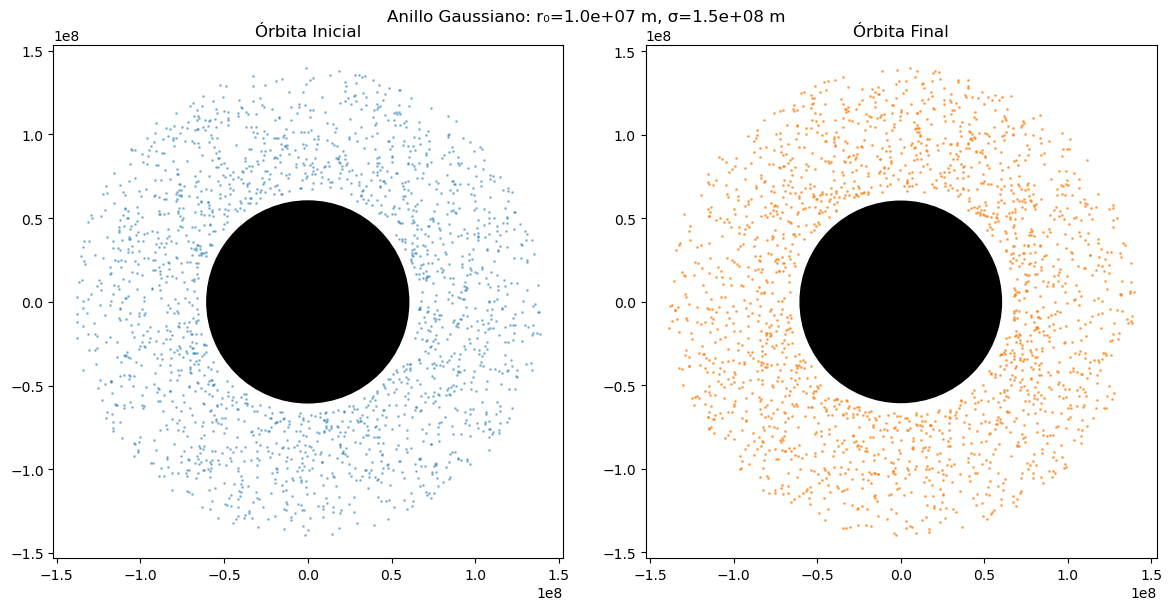

In [49]:
##Ahora, gráficamos el anillo inicial vs el anillo final de la simulación
fig, axs = plt.subplots(1, 2, figsize=(12,6))

##Anillo inicial
axs[0].scatter(pos0[:,0], pos0[:,1], s=1, alpha=0.4, color='C0')
axs[0].add_patch(plt.Circle((0,0), R_planeta, color='black'))
axs[0].set_aspect('equal'); axs[0].set_title('Órbita Inicial')
##Anillo final
axs[1].scatter(pos[:,0], pos[:,1], s=1, alpha=0.6, color='C1')
axs[1].add_patch(plt.Circle((0,0), R_planeta, color='black'))
axs[1].set_aspect('equal'); axs[1].set_title('Órbita Final')

plt.suptitle(f'Anillo Gaussiano: r₀={r0:.1e} m, σ={sigma:.1e} m')
plt.tight_layout()
plt.show()

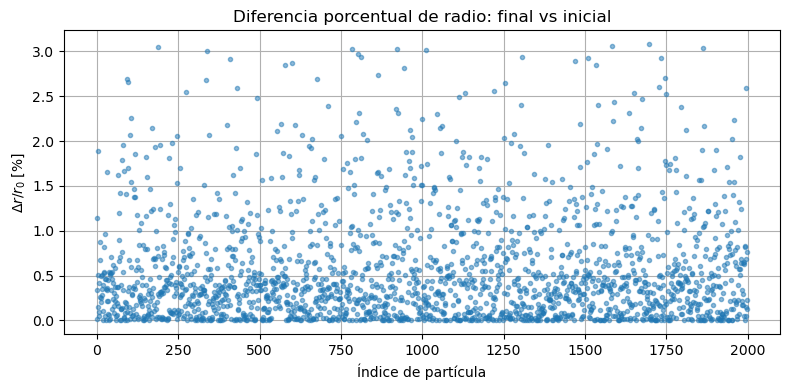

In [50]:
##Diferencia porcentual de radios
radios0 = np.linalg.norm(pos0, axis=1)
radios_f= np.linalg.norm(pos,  axis=1)
delta_p = 100.0 * (radios_f - radios0) / radios0

plt.figure(figsize=(8,4))
plt.plot(delta_p, '.', alpha=0.5)
plt.xlabel('Índice de partícula')
plt.ylabel(r'$\Delta r / r_0\;[\%]$')
plt.title('Diferencia porcentual de radio: final vs inicial')
plt.grid()
plt.tight_layout()
plt.show()

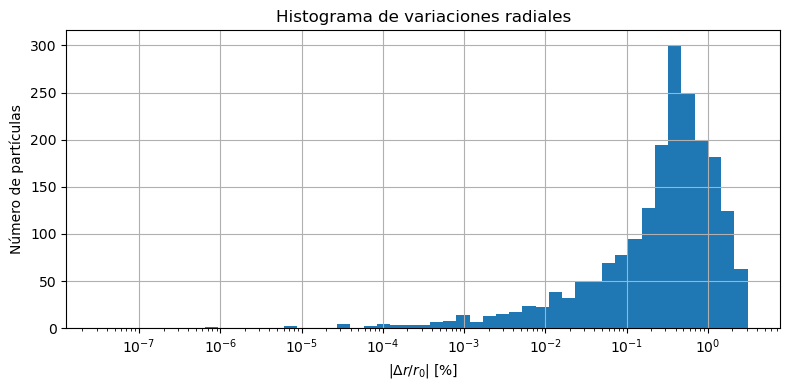

In [51]:
##Histograma de variaciones radiales
vals = np.abs(delta_p[delta_p>0])
plt.figure(figsize=(8,4))
plt.hist(vals, bins=np.logspace(np.log10(vals.min()), np.log10(vals.max()), 50))
plt.xscale('log')
plt.xlabel(r'$|\Delta r / r_0|\;[\%]$')
plt.ylabel('Número de partículas')
plt.title('Histograma de variaciones radiales')
plt.grid()
plt.tight_layout()
plt.show()

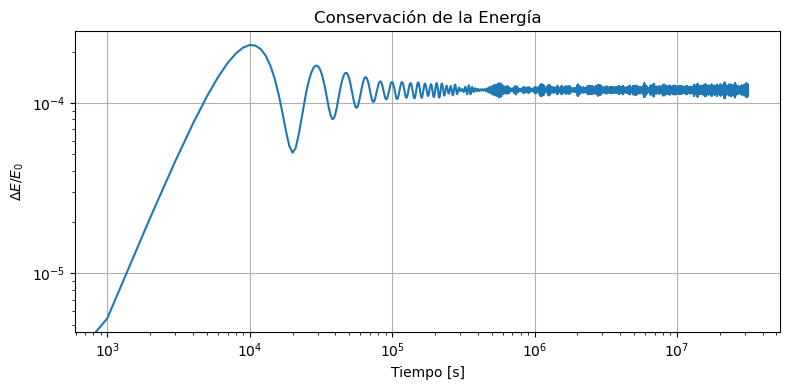

In [52]:
##Conservación de la energía
##Energía relativa ΔE/E0
E0 = energias[0]
deltaE = (energias - E0) / abs(E0)

plt.figure(figsize=(8,4))
plt.plot(tiempos, deltaE)
plt.xscale('log'), plt.yscale('log')
plt.xlabel('Tiempo [s]')
plt.ylabel(r'$\Delta E / E_0$')
plt.title('Conservación de la Energía')
plt.grid()
plt.tight_layout()
plt.show()

## Distribución radial mixta

Ahora, para darle más variedad a nuestras distribuciones, vamos a realizar un anillo que se dirija bajo la regla de la potencia más la regla de Gauss. Lo que deberíamos poder observar son dos regiones diferentes en el anillo en los que se concentran una mayor cantidad de partículas, formando dos anillos más densos dentro del propio anillo, aunque esto dependerá del tiempo de simulación y de las variables $p$, $r_0$ y $\sigma$.

### Órbita con $p=9.5$, $r_0=15\times 10^7$ y $\sigma=1\times 10^7$

In [53]:
##Parametros físicos
G = 6.67430e-11 ##Constante de gravitación [m^3 kg^-1 s^-2]
M = 5.683e26 ##Masa del planeta [kg]
R_planeta = 6.0268e7  ##Radio del planeta [m]
r_in, r_out = 6.6e7, 1.4e8 ##radios interior/exterior [m]
##Verificamos órbitas
ver_orbita(r_in, r_out, R_planeta) 

N = 2000   ##Número de partículas que conforman al anillo
np.random.seed(24) ##Reproducibilidad del mismo modelo

##Muestreo de la distribución mixta
##Fracción de partículas para cada componente
f_power = 0.6    ##60% ley potencia, 40% gaussiano
N_power = int(N * f_power)
N_gauss = N - N_power

##Parámetros de la ley de la potencia
p = 9.5
#Parámetros gaussiano
r0    = 15.0e7
sigma = 1.0e7

##Muestreo independiente
radios_pl = sample_powerlaw(r_in, r_out, N_power, p)
radios_gauss = sample_gaussian_ring(r_in, r_out, N_gauss, r0, sigma)

##Concatenamos radios
radios = np.concatenate([radios_pl, radios_gauss])
##Ángulos uniformes
thetas = np.random.uniform(0, 2*np.pi, size=N)

##Coordenadas cartesianas
x   = radios * np.cos(thetas)
y   = radios * np.sin(thetas)
pos = np.column_stack([x, y])  ##posiciones iniciales
pos0= pos.copy()               ##guardamos para comparar radios

##Velocidades circulares inerciales
v_circ = np.sqrt(G * M / radios)
vx     = -v_circ * np.sin(thetas)
vy     =  v_circ * np.cos(thetas)
vel    = np.column_stack([vx, vy])  ##velocidades iniciales
vel0   = vel.copy()

##Parametros de integración
dt = 1e3   ##paso de tiempo [s]
t_max = 365*24*3600 ##1 año
n_steps = int(np.ceil(t_max / dt)) ##Número de pasos
save_interval = 1 ##Guardamos cada 1 paso

##Arrays de salida: tiempos y energías
n_saves  = n_steps // save_interval + 1
tiempos  = np.zeros(n_saves)
energias = np.zeros(n_saves)

##Inicialización de tiempo y energía
t = 0.0
tiempos[0]  = t
energias[0] = energia_inercial(pos, vel, G, M)

##Bucle de integración
idx = 1
for paso in range(1, n_steps+1):
    pos, vel = paso_leapfrog_inercial(pos, vel, dt)
    t += dt
    if paso % save_interval == 0:
        tiempos[idx]  = t
        energias[idx] = energia_inercial(pos, vel, G, M)
        idx += 1

print(f"Simulación completada.")

Órbitas correctas.
Simulación completada.


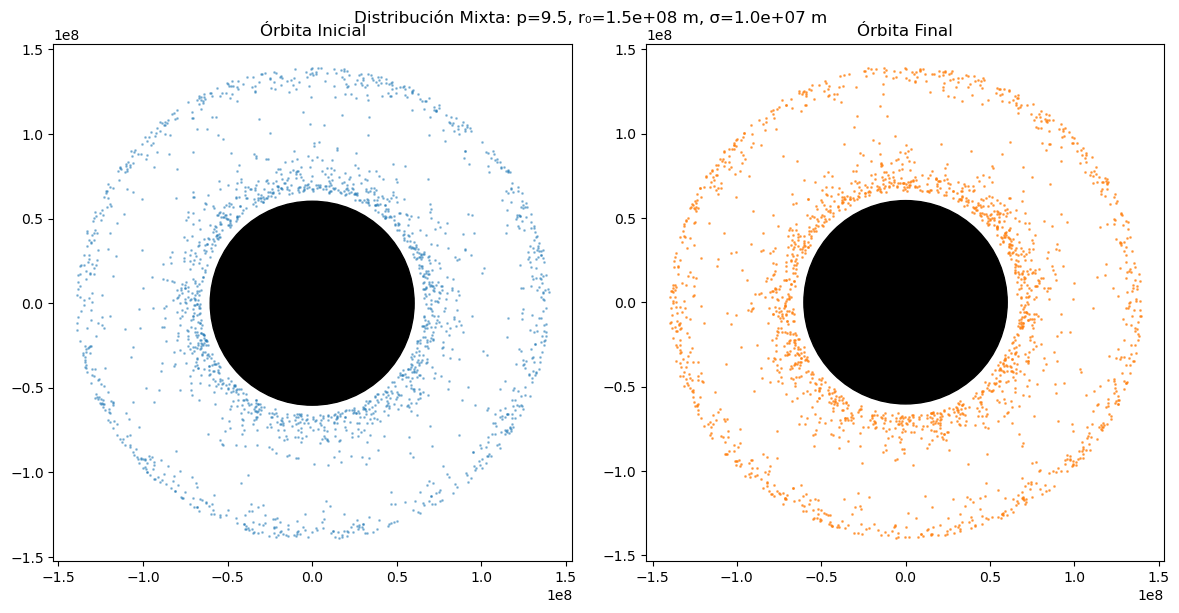

In [54]:
##Ahora, gráficamos el anillo inicial vs el anillo final de la simulación
fig, axs = plt.subplots(1, 2, figsize=(12,6))

##Anillo inicial
axs[0].scatter(pos0[:,0], pos0[:,1], s=1, alpha=0.4, color='C0')
axs[0].add_patch(plt.Circle((0,0), R_planeta, color='black'))
axs[0].set_aspect('equal'); axs[0].set_title('Órbita Inicial')
##Anillo final
axs[1].scatter(pos[:,0], pos[:,1], s=1, alpha=0.6, color='C1')
axs[1].add_patch(plt.Circle((0,0), R_planeta, color='black'))
axs[1].set_aspect('equal'); axs[1].set_title('Órbita Final')

plt.suptitle(f'Distribución Mixta: p={p:}, r₀={r0:.1e} m, σ={sigma:.1e} m')
plt.tight_layout()
plt.show()

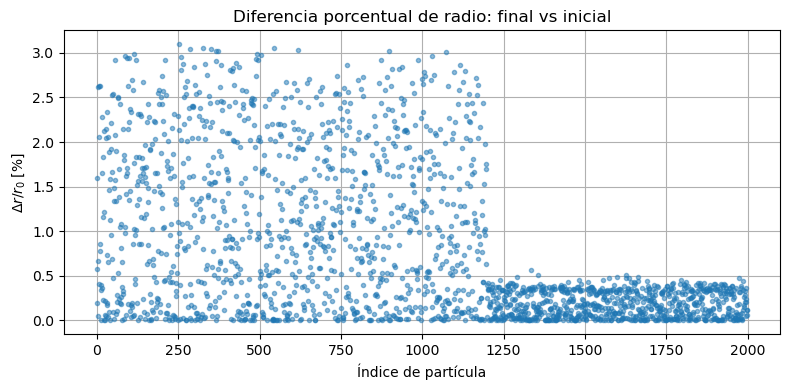

In [55]:
##Diferencia porcentual de radios
radios0 = np.linalg.norm(pos0, axis=1)
radios_f= np.linalg.norm(pos,  axis=1)
delta_p = 100.0 * (radios_f - radios0) / radios0

plt.figure(figsize=(8,4))
plt.plot(delta_p, '.', alpha=0.5)
plt.xlabel('Índice de partícula')
plt.ylabel(r'$\Delta r / r_0\;[\%]$')
plt.title('Diferencia porcentual de radio: final vs inicial')
plt.grid()
plt.tight_layout()
plt.show()

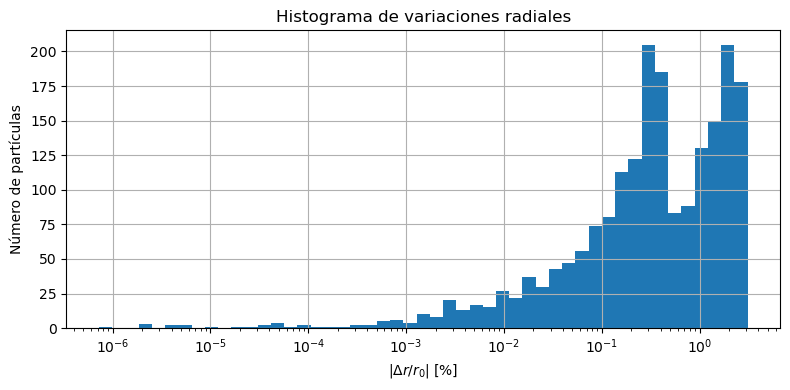

In [56]:
##Histograma de variaciones radiales
vals = np.abs(delta_p[delta_p>0])
plt.figure(figsize=(8,4))
plt.hist(vals, bins=np.logspace(np.log10(vals.min()), np.log10(vals.max()), 50))
plt.xscale('log')
plt.xlabel(r'$|\Delta r / r_0|\;[\%]$')
plt.ylabel('Número de partículas')
plt.title('Histograma de variaciones radiales')
plt.grid()
plt.tight_layout()
plt.show()

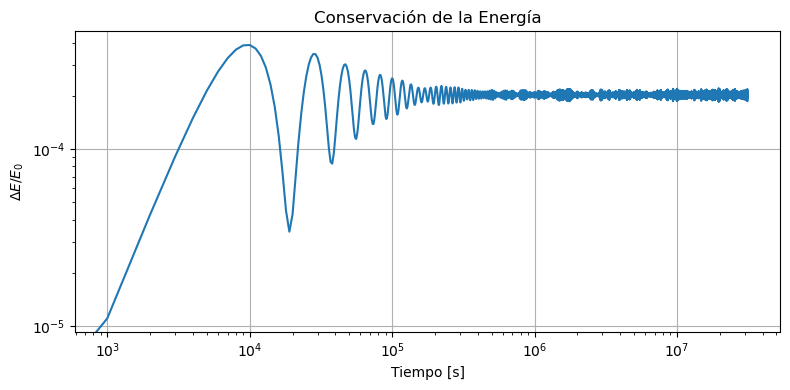

In [57]:
##Conservación de la energía
##Energía relativa ΔE/E0
E0 = energias[0]
deltaE = (energias - E0) / abs(E0)

plt.figure(figsize=(8,4))
plt.plot(tiempos, deltaE)
plt.xscale('log'), plt.yscale('log')
plt.xlabel('Tiempo [s]')
plt.ylabel(r'$\Delta E / E_0$')
plt.title('Conservación de la Energía')
plt.grid()
plt.tight_layout()
plt.show()

### Órbita con $p=2.3$, $r_0=15\times 10^7$ y $\sigma=1\times 10^7$

In [58]:
##Parametros físicos
G = 6.67430e-11 ##Constante de gravitación [m^3 kg^-1 s^-2]
M = 5.683e26 ##Masa del planeta [kg]
R_planeta = 6.0268e7  ##Radio del planeta [m]
r_in, r_out = 6.6e7, 1.4e8 ##radios interior/exterior [m]
##Verificamos órbitas
ver_orbita(r_in, r_out, R_planeta) 

N = 2000   ##Número de partículas que conforman al anillo
np.random.seed(24) ##Reproducibilidad del mismo modelo

##Muestreo de la distribución mixta
##Fracción de partículas para cada componente
f_power = 0.6    ##60% ley potencia, 40% gaussiano
N_power = int(N * f_power)
N_gauss = N - N_power

##Parámetros de la ley de la potencia
p = 2.3
#Parámetros gaussiano
r0    = 15.0e7
sigma = 1.0e7

##Muestreo independiente
radios_pl = sample_powerlaw(r_in, r_out, N_power, p)
radios_gauss = sample_gaussian_ring(r_in, r_out, N_gauss, r0, sigma)

##Concatenamos radios
radios = np.concatenate([radios_pl, radios_gauss])
##Ángulos uniformes
thetas = np.random.uniform(0, 2*np.pi, size=N)

##Coordenadas cartesianas
x   = radios * np.cos(thetas)
y   = radios * np.sin(thetas)
pos = np.column_stack([x, y])  ##posiciones iniciales
pos0= pos.copy()               ##guardamos para comparar radios

##Velocidades circulares inerciales
v_circ = np.sqrt(G * M / radios)
vx     = -v_circ * np.sin(thetas)
vy     =  v_circ * np.cos(thetas)
vel    = np.column_stack([vx, vy])  ##velocidades iniciales
vel0   = vel.copy()

##Parametros de integración
dt = 1e3   ##paso de tiempo [s]
t_max = 365*24*3600 ##1 año
n_steps = int(np.ceil(t_max / dt)) ##Número de pasos
save_interval = 1 ##Guardamos cada 1 paso

##Arrays de salida: tiempos y energías
n_saves  = n_steps // save_interval + 1
tiempos  = np.zeros(n_saves)
energias = np.zeros(n_saves)

##Inicialización de tiempo y energía
t = 0.0
tiempos[0]  = t
energias[0] = energia_inercial(pos, vel, G, M)

##Bucle de integración
idx = 1
for paso in range(1, n_steps+1):
    pos, vel = paso_leapfrog_inercial(pos, vel, dt)
    t += dt
    if paso % save_interval == 0:
        tiempos[idx]  = t
        energias[idx] = energia_inercial(pos, vel, G, M)
        idx += 1

print(f"Simulación completada.")

Órbitas correctas.
Simulación completada.


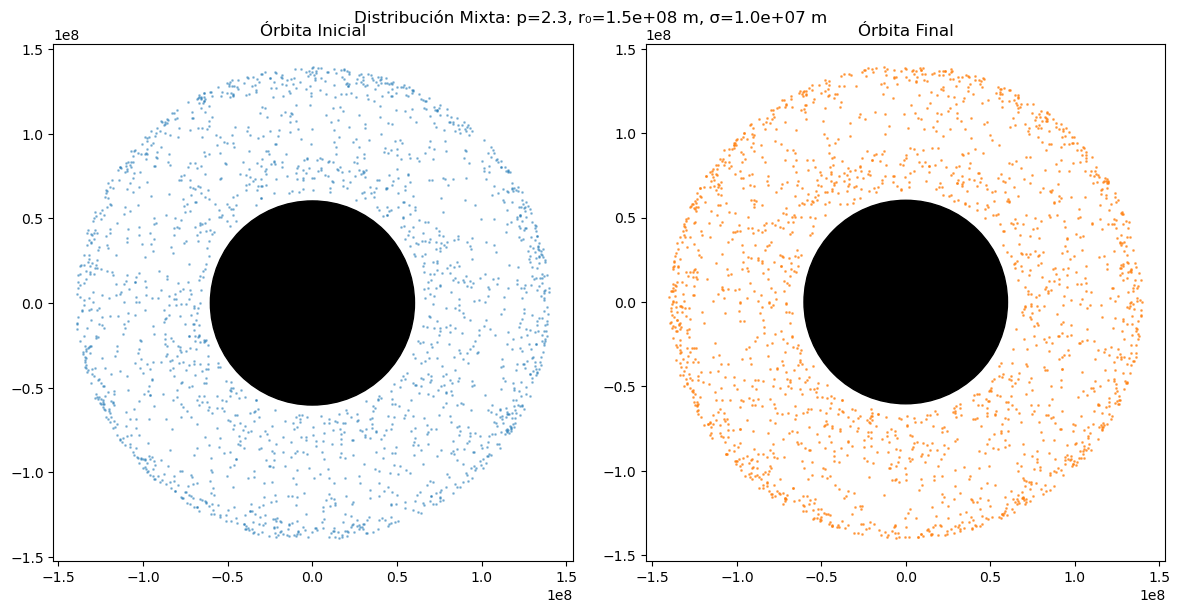

In [59]:
##Ahora, gráficamos el anillo inicial vs el anillo final de la simulación
fig, axs = plt.subplots(1, 2, figsize=(12,6))

##Anillo inicial
axs[0].scatter(pos0[:,0], pos0[:,1], s=1, alpha=0.4, color='C0')
axs[0].add_patch(plt.Circle((0,0), R_planeta, color='black'))
axs[0].set_aspect('equal'); axs[0].set_title('Órbita Inicial')
##Anillo final
axs[1].scatter(pos[:,0], pos[:,1], s=1, alpha=0.6, color='C1')
axs[1].add_patch(plt.Circle((0,0), R_planeta, color='black'))
axs[1].set_aspect('equal'); axs[1].set_title('Órbita Final')

plt.suptitle(f'Distribución Mixta: p={p:}, r₀={r0:.1e} m, σ={sigma:.1e} m')
plt.tight_layout()
plt.show()

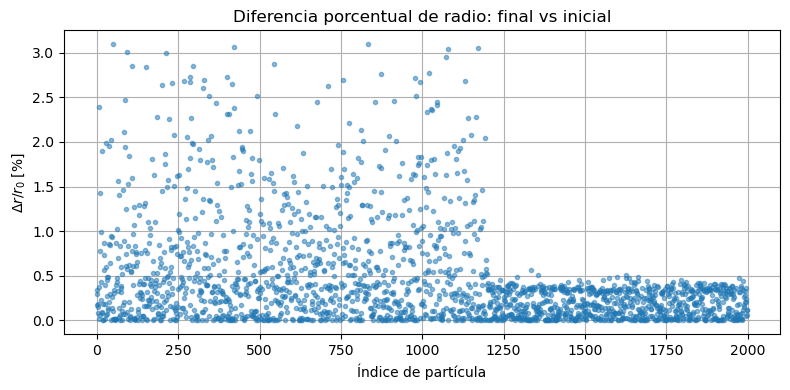

In [60]:
##Diferencia porcentual de radios
radios0 = np.linalg.norm(pos0, axis=1)
radios_f= np.linalg.norm(pos,  axis=1)
delta_p = 100.0 * (radios_f - radios0) / radios0

plt.figure(figsize=(8,4))
plt.plot(delta_p, '.', alpha=0.5)
plt.xlabel('Índice de partícula')
plt.ylabel(r'$\Delta r / r_0\;[\%]$')
plt.title('Diferencia porcentual de radio: final vs inicial')
plt.grid()
plt.tight_layout()
plt.show()

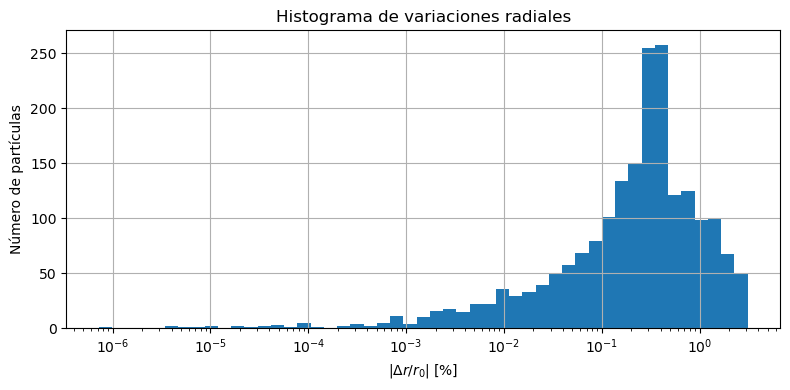

In [61]:
##Histograma de variaciones radiales
vals = np.abs(delta_p[delta_p>0])
plt.figure(figsize=(8,4))
plt.hist(vals, bins=np.logspace(np.log10(vals.min()), np.log10(vals.max()), 50))
plt.xscale('log')
plt.xlabel(r'$|\Delta r / r_0|\;[\%]$')
plt.ylabel('Número de partículas')
plt.title('Histograma de variaciones radiales')
plt.grid()
plt.tight_layout()
plt.show()

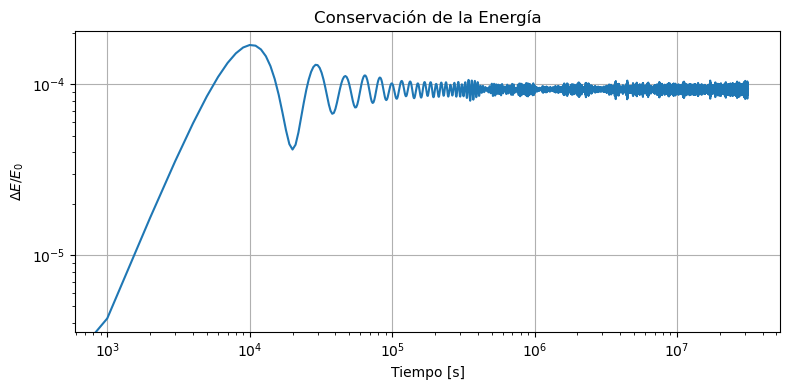

In [62]:
##Conservación de la energía
##Energía relativa ΔE/E0
E0 = energias[0]
deltaE = (energias - E0) / abs(E0)

plt.figure(figsize=(8,4))
plt.plot(tiempos, deltaE)
plt.xscale('log'), plt.yscale('log')
plt.xlabel('Tiempo [s]')
plt.ylabel(r'$\Delta E / E_0$')
plt.title('Conservación de la Energía')
plt.grid()
plt.tight_layout()
plt.show()

### Órbita con $p=9.5$, $r_0=15\times 10^7$ y $\sigma=1\times 10^7$

In [63]:
##Parametros físicos
G = 6.67430e-11 ##Constante de gravitación [m^3 kg^-1 s^-2]
M = 5.683e26 ##Masa del planeta [kg]
R_planeta = 6.0268e7  ##Radio del planeta [m]
r_in, r_out = 6.6e7, 1.4e8 ##radios interior/exterior [m]
##Verificamos órbitas
ver_orbita(r_in, r_out, R_planeta) 

N = 2000   ##Número de partículas que conforman al anillo
np.random.seed(24) ##Reproducibilidad del mismo modelo

##Muestreo de la distribución mixta
##Fracción de partículas para cada componente
f_power = 0.2    ##20% ley potencia, 80% gaussiano
N_power = int(N * f_power)
N_gauss = N - N_power

##Parámetros de la ley de la potencia
p = 9.5
#Parámetros gaussiano
r0    = 15.0e7
sigma = 1.0e7

##Muestreo independiente
radios_pl = sample_powerlaw(r_in, r_out, N_power, p)
radios_gauss = sample_gaussian_ring(r_in, r_out, N_gauss, r0, sigma)

##Concatenamos radios
radios = np.concatenate([radios_pl, radios_gauss])
##Ángulos uniformes
thetas = np.random.uniform(0, 2*np.pi, size=N)

##Coordenadas cartesianas
x   = radios * np.cos(thetas)
y   = radios * np.sin(thetas)
pos = np.column_stack([x, y])  ##posiciones iniciales
pos0= pos.copy()               ##guardamos para comparar radios

##Velocidades circulares inerciales
v_circ = np.sqrt(G * M / radios)
vx     = -v_circ * np.sin(thetas)
vy     =  v_circ * np.cos(thetas)
vel    = np.column_stack([vx, vy])  ##velocidades iniciales
vel0   = vel.copy()

##Parametros de integración
dt = 1e3   ##paso de tiempo [s]
t_max = 365*24*3600 ##1 año
n_steps = int(np.ceil(t_max / dt)) ##Número de pasos
save_interval = 1 ##Guardamos cada 1 paso

##Arrays de salida: tiempos y energías
n_saves  = n_steps // save_interval + 1
tiempos  = np.zeros(n_saves)
energias = np.zeros(n_saves)

##Inicialización de tiempo y energía
t = 0.0
tiempos[0]  = t
energias[0] = energia_inercial(pos, vel, G, M)

##Bucle de integración
idx = 1
for paso in range(1, n_steps+1):
    pos, vel = paso_leapfrog_inercial(pos, vel, dt)
    t += dt
    if paso % save_interval == 0:
        tiempos[idx]  = t
        energias[idx] = energia_inercial(pos, vel, G, M)
        idx += 1

print(f"Simulación completada.")

Órbitas correctas.
Simulación completada.


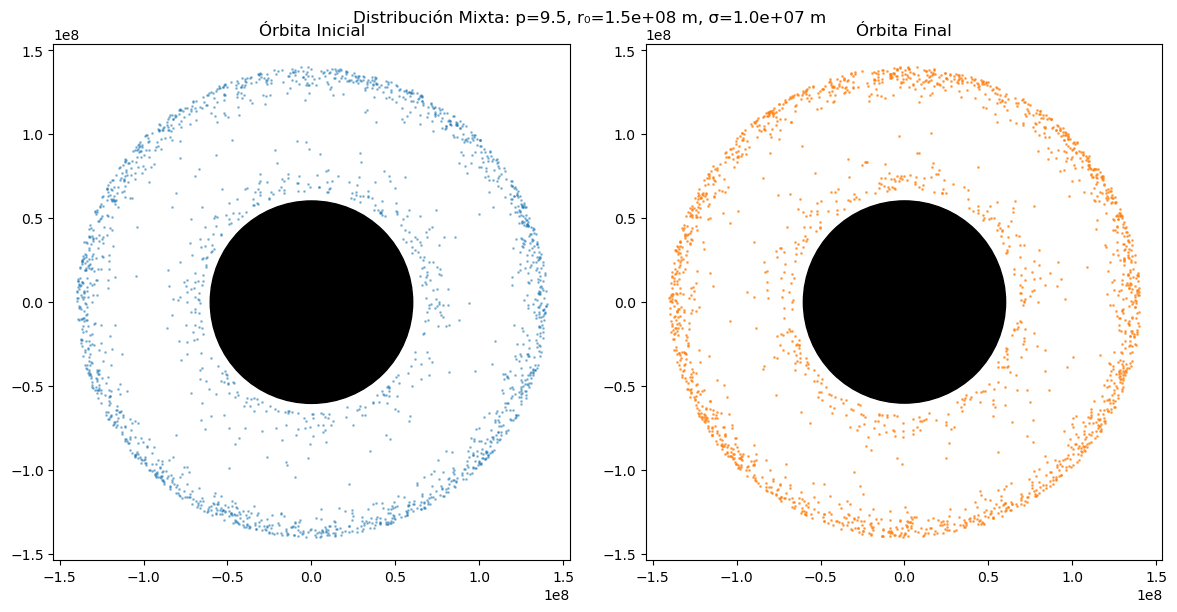

In [64]:
##Ahora, gráficamos el anillo inicial vs el anillo final de la simulación
fig, axs = plt.subplots(1, 2, figsize=(12,6))

##Anillo inicial
axs[0].scatter(pos0[:,0], pos0[:,1], s=1, alpha=0.4, color='C0')
axs[0].add_patch(plt.Circle((0,0), R_planeta, color='black'))
axs[0].set_aspect('equal'); axs[0].set_title('Órbita Inicial')
##Anillo final
axs[1].scatter(pos[:,0], pos[:,1], s=1, alpha=0.6, color='C1')
axs[1].add_patch(plt.Circle((0,0), R_planeta, color='black'))
axs[1].set_aspect('equal'); axs[1].set_title('Órbita Final')

plt.suptitle(f'Distribución Mixta: p={p:}, r₀={r0:.1e} m, σ={sigma:.1e} m')
plt.tight_layout()
plt.show()

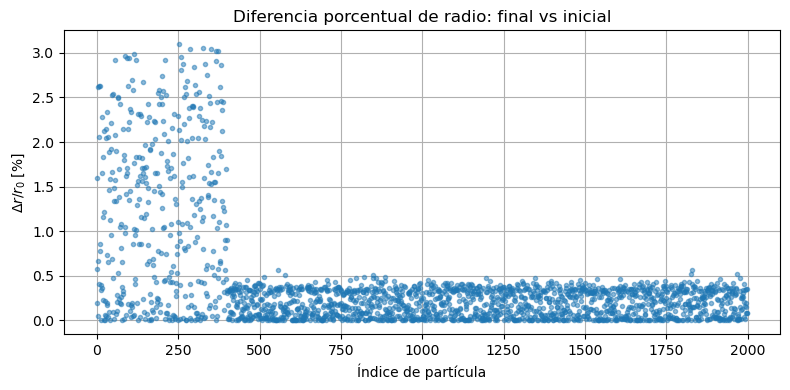

In [65]:
##Diferencia porcentual de radios
radios0 = np.linalg.norm(pos0, axis=1)
radios_f= np.linalg.norm(pos,  axis=1)
delta_p = 100.0 * (radios_f - radios0) / radios0

plt.figure(figsize=(8,4))
plt.plot(delta_p, '.', alpha=0.5)
plt.xlabel('Índice de partícula')
plt.ylabel(r'$\Delta r / r_0\;[\%]$')
plt.title('Diferencia porcentual de radio: final vs inicial')
plt.grid()
plt.tight_layout()
plt.show()

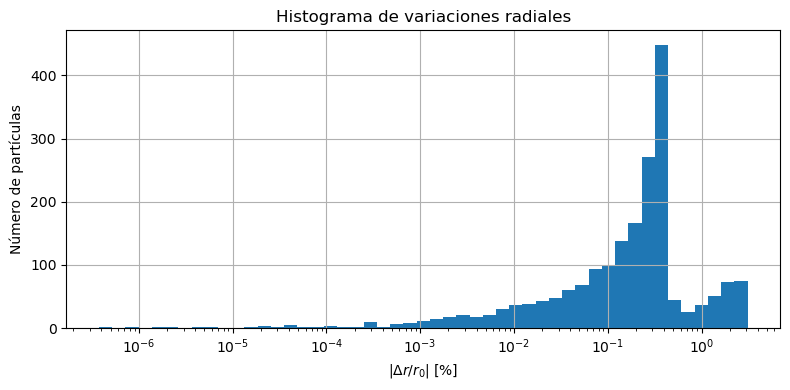

In [66]:
##Histograma de variaciones radiales
vals = np.abs(delta_p[delta_p>0])
plt.figure(figsize=(8,4))
plt.hist(vals, bins=np.logspace(np.log10(vals.min()), np.log10(vals.max()), 50))
plt.xscale('log')
plt.xlabel(r'$|\Delta r / r_0|\;[\%]$')
plt.ylabel('Número de partículas')
plt.title('Histograma de variaciones radiales')
plt.grid()
plt.tight_layout()
plt.show()

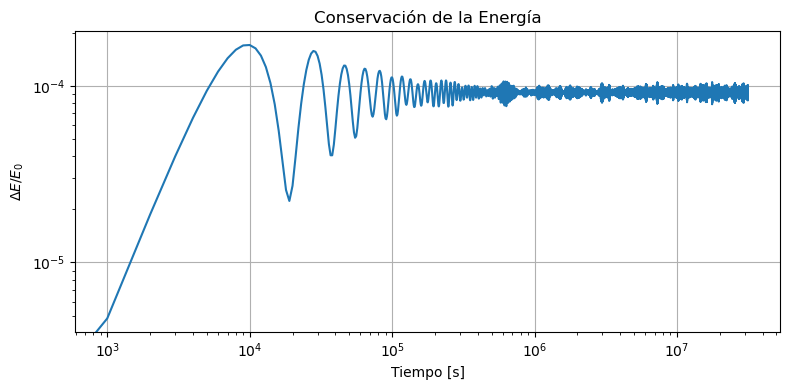

In [67]:
##Conservación de la energía
##Energía relativa ΔE/E0
E0 = energias[0]
deltaE = (energias - E0) / abs(E0)

plt.figure(figsize=(8,4))
plt.plot(tiempos, deltaE)
plt.xscale('log'), plt.yscale('log')
plt.xlabel('Tiempo [s]')
plt.ylabel(r'$\Delta E / E_0$')
plt.title('Conservación de la Energía')
plt.grid()
plt.tight_layout()
plt.show()

## Resonancia

### Teoría

Recordemos, en algunos anillos planetarios, como los de Saturno, un satélite cercano puede inducir resonancias orbitales, es decir, ubicaciones donde la relación entre el periodo de órbita de las partículas del anillo y la del satélite es una fracción simple $(p:q)$. Allí las perturbaciones gravitatorias se refuerzan y las partículas tienden a desplazarse, creando huecos o acumulaciones en el anillo, como por ejemplo, la resonancia de Cassini.

Para modelarlo, debemos considerar el planeta con masa $M$ que genera una aceleración gravitatoria:
$$
\vec a_g=-\ \frac{G\ M}{r^3}\vec r
$$

El satélite de masa $m_s$ en órbita circular de radio $a_s$:
$$
\vec r_s(t)=a_s(\cos(\omega_s)t\text{, }\sin(\omega_s)t) \ \ \ \text{donde } \ \ \ \omega_s=\sqrt{\dfrac{G\ M}{a_s^3}}
$$

El cuál genera una perturbación natural:
$$
\vec a_{sat}=-Gm_s \dfrac{\vec r-\vec r_s(t)}{|\vec r-\vec r_s(t)|^3}
$$

Por lo cuál:
$$
\ddot r= \vec a_g+\vec a_{sat}
$$

In [68]:
##Recuperamos funciones
##Definimos el paso de Leapfrog para este caso, que incluye la fuerza del planeta y la del satélite
def paso_leapfrog_sat(pos, vel, dt, t, G, M, m_s, a_s, Omega_s):
    ##Drift medio
    pos_mid = pos + 0.5 * dt * vel
    
    ##Tiempo medio
    t_mid = t + 0.5 * dt
    
    ##Gravedad central
    r_mid = np.linalg.norm(pos_mid, axis=1)
    a_grav = -G * M * pos_mid / (r_mid[:,None]**3)
    
    ##Posición del satélite en t_mid
    x_s_mid = a_s * np.cos(Omega_s * t_mid)
    y_s_mid = a_s * np.sin(Omega_s * t_mid)
    r_s_mid = np.array([x_s_mid, y_s_mid])
    
    ##Gravedad del satélite
    d = pos_mid - r_s_mid
    d_norm = np.linalg.norm(d, axis=1)
    a_sat  = -G * m_s * d / (d_norm[:,None]**3)
    
    ##Kick completo
    vel_new = vel + dt * (a_grav + a_sat)
    
    ##Drift medio final
    pos_new = pos_mid + 0.5 * dt * vel_new
    return pos_new, vel_new

##Redefinimos la energía para incluir la energía potencial del satélite
def energia_inercial_sat(pos, vel, G, M, m_s, a_s, Omega_s, t):
    T = 0.5 * np.sum(np.linalg.norm(vel,axis=1)**2)
    r = np.linalg.norm(pos, axis=1)
    Uc = -G * M * np.sum(1.0 / r)
    x_s = a_s * np.cos(Omega_s * t)
    y_s = a_s * np.sin(Omega_s * t)
    d = np.linalg.norm(pos - np.array([x_s,y_s]), axis=1)
    Us= -G * m_s * np.sum(1.0 / d)
    return T + Uc + Us

### Órbita con resonancia $2:1$

In [69]:
##Parametros físicos
G = 6.67430e-11 ##Constante de gravitación [m^3 kg^-1 s^-2]
M = 5.683e26 ##Masa del planeta [kg]
R_planeta = 6.0268e7  ##Radio del planeta [m]

r_in, r_out = 6.6e7, 1.4e8 ##radios interior/exterior [m]
##Verificamos órbitas
ver_orbita(r_in, r_out, R_planeta) 

##Parametros del satélite
m_s = 1e23  ##Masa satélite [kg]
a_s = 2.0e8 ##Radio orbital satélite [m] >> r_out
Omega_s = np.sqrt(G * M / a_s**3)       ##Velocidad angular

##Distribución del anillo
N = 2000   ##Número de partículas que conforman al anillo
np.random.seed(24) ##Reproducibilidad del mismo modelo

radios = np.random.uniform(r_in, r_out, size=N)
thetas= np.random.uniform(0, 2*np.pi, size=N)
pos = np.column_stack([radios*np.cos(thetas), radios*np.sin(thetas)])
pos0= pos.copy()
v_circ = np.sqrt(G * M / radios)
vel = np.column_stack([-v_circ*np.sin(thetas),
                          v_circ*np.cos(thetas)])
vel0 = vel.copy()

##Parametros de integración
dt = 1e2   ##paso de tiempo [s]
n_a = 10  ##Número de años
t_max = n_a * 365 * 24 * 3600 ##Tiempo máximo de simulación
n_steps = int(np.ceil(t_max / dt))
save_interval = max(1, n_steps // 50)

##Arrays de salida: tiempos y energías
n_saves  = n_steps // save_interval + 1
tiempos  = np.zeros(n_saves)
energias = np.zeros(n_saves)

##Inicialización de tiempo y energía
t = 0.0
tiempos[0]  = t
energias[0] = energia_inercial_sat(pos, vel, G, M, m_s, a_s, Omega_s, t)

##Bucle de integración
idx = 1
for paso in range(1, n_steps+1):
    pos, vel = paso_leapfrog_sat(pos, vel, dt, t, G, M, m_s, a_s, Omega_s)
    t += dt
    if paso % save_interval == 0:
        tiempos[idx]  = t
        energias[idx] = energia_inercial_sat(pos, vel, G, M, m_s, a_s, Omega_s, t)
        idx += 1

print(f"Simulación completada.")

Órbitas correctas.
Simulación completada.


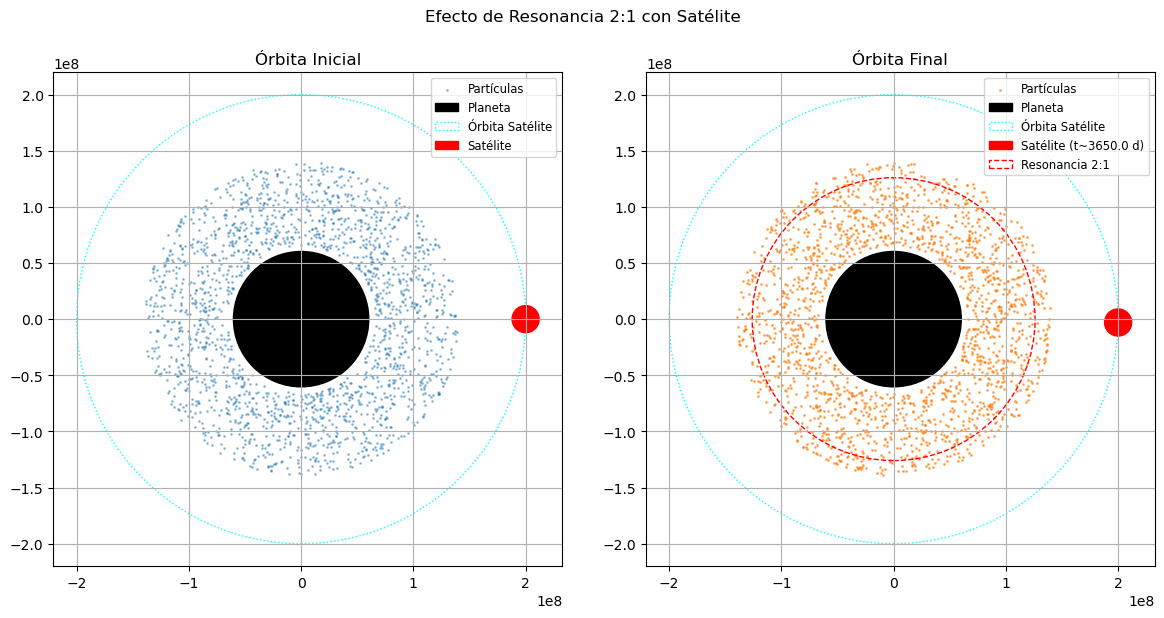

In [70]:
##Ahora, gráficamos el anillo inicial vs el anillo final de la simulación
##Recuperamos las posiciones del satélite en t=0 y t_final
x_s0, y_s0 = a_s, 0.0
x_sF = a_s * np.cos(Omega_s * t)
y_sF = a_s * np.sin(Omega_s * t)

##Resonancia 2:1
r_res_21 = a_s * (1/2)**(2/3)

##Creamos la figura para gráficar
fig, axs = plt.subplots(1, 2, figsize=(12,6))

##Órbita Inicial
axs[0].scatter(pos0[:,0], pos0[:,1], s=1, alpha=0.4, color='C0', label='Partículas')
axs[0].add_patch(plt.Circle((0,0), R_planeta, color='black', label='Planeta'))
##Órbita del satélite
axs[0].add_patch(plt.Circle((0,0), a_s, fill=False, color='cyan', linestyle=':', label='Órbita Satélite'))
##Posición satélite
axs[0].add_patch(plt.Circle((x_s0,y_s0), R_planeta*0.2, color='red', label='Satélite')) 
axs[0].set_aspect('equal'); axs[0].set_title('Órbita Inicial')
axs[0].legend(loc='upper right', fontsize='small') 
axs[0].grid()

##Órbita Final
axs[1].scatter(pos[:,0], pos[:,1], s=1, alpha=0.6, color='C1', label='Partículas')
axs[1].add_patch(plt.Circle((0,0), R_planeta, color='black', label='Planeta'))
axs[1].add_patch(plt.Circle((0,0), a_s, fill=False, color='cyan', linestyle=':', label='Órbita Satélite'))
axs[1].add_patch(plt.Circle((x_sF,y_sF), R_planeta*0.2, color='red', label=f'Satélite (t~{t/86400:.1f} d)'))
axs[1].add_patch(plt.Circle((0,0), r_res_21, fill=False, linestyle='--', color='red', label='Resonancia 2:1'))
axs[1].set_aspect('equal'); axs[1].set_title('Órbita Final')
axs[1].legend(loc='upper right', fontsize='small')
axs[1].grid()

plt.suptitle('Efecto de Resonancia 2:1 con Satélite')
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

Notemos que la distribución del anillo después de $10$ años de simulación no muestra un desplazamiento tan explícito producida por la resonancia del satélite. Esto puede tener diversas explicaciones, sin embargo, la más importante es el tiempo de simulación, debido a que las largas bandas de separación a lo largo de una órbita por parte de un satélite puede tardar muchos años en definirse, sin embargo, podemos lograr ver el efecto si gráficamos la densidad radial del anillo después de la simulación, se debería poder observar una densidad mucho menor en la zona de resonancia respecto al resto del anillo.

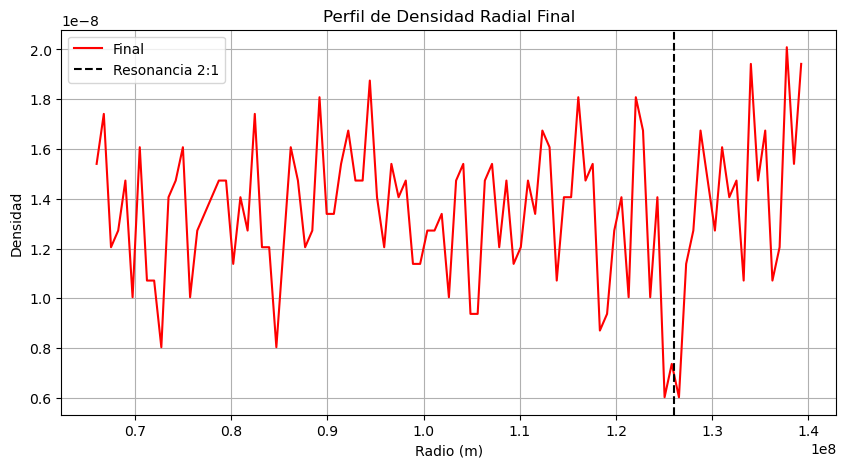

In [71]:
##Calculamos la densidad radial del anillo
radios_final = np.linalg.norm(pos, axis=1)
bins = np.linspace(r_in, r_out, 100)
hist, bin_edges = np.histogram(radios_final, bins=bins, density=True)

##Graficamos la densidad radial inicial vs final
plt.figure(figsize=(10,5))
plt.plot(bin_edges[:-1], hist, 'r-', label='Final')
plt.axvline(r_res_21, color='k', linestyle='--', label='Resonancia 2:1')
plt.xlabel('Radio (m)'); plt.ylabel('Densidad')
plt.legend(); plt.grid()
plt.title('Perfil de Densidad Radial Final')
plt.show()

Veamos que el anillo sigue siendo muy estable a través del tiempo a pesar de la resonancia con el satélite, esto lo podemos observar al gráficar la diferencia porcentual de los radios final vs inicial.

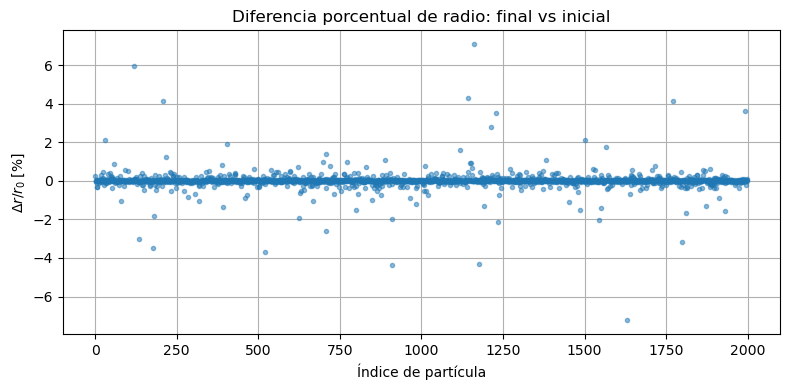

In [72]:
##Diferencia porcentual de radios
radios0 = np.linalg.norm(pos0, axis=1)
radios_f= np.linalg.norm(pos,  axis=1)
delta_p = 100.0 * (radios_f - radios0) / radios0

plt.figure(figsize=(8,4))
plt.plot(delta_p, '.', alpha=0.5)
plt.xlabel('Índice de partícula')
plt.ylabel(r'$\Delta r / r_0\;[\%]$')
plt.title('Diferencia porcentual de radio: final vs inicial')
plt.grid()
plt.tight_layout()
plt.show()

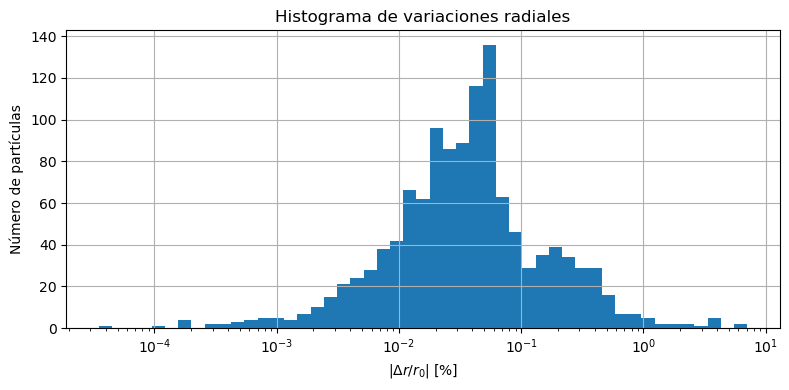

In [73]:
##Histograma de variaciones radiales
vals = np.abs(delta_p[delta_p>0])
plt.figure(figsize=(8,4))
plt.hist(vals, bins=np.logspace(np.log10(vals.min()), np.log10(vals.max()), 50))
plt.xscale('log')
plt.xlabel(r'$|\Delta r / r_0|\;[\%]$')
plt.ylabel('Número de partículas')
plt.title('Histograma de variaciones radiales')
plt.grid()
plt.tight_layout()
plt.show()

Y aún se conserva la energía.

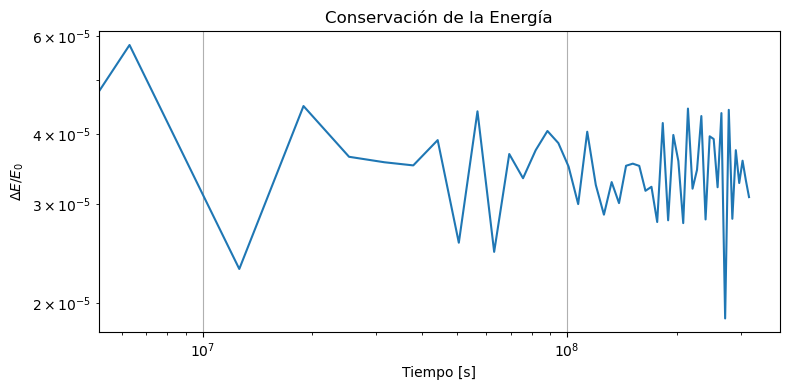

In [74]:
##Conservación de la energía
##Energía relativa ΔE/E0
E0 = energias[0]
deltaE = abs((energias - E0) / abs(E0))

plt.figure(figsize=(8,4))
plt.plot(tiempos, deltaE)
plt.xscale('log'), plt.yscale('log')
plt.xlabel('Tiempo [s]')
plt.ylabel(r'$\Delta E / E_0$')
plt.title('Conservación de la Energía')
plt.grid()
plt.tight_layout()
plt.show()

## Conclusiones

Para el planteamiento de este proyecto, se decidió construir a partir de distintas distribuciones de partículas, un anillo planetario que se mantuviera estable a través del tiempo, esto suponía diferentes retos debido a que se debía compilar la información de la trayectoria de cada partícula que conformaría el anillo, lo que conllevaba a gastar más recursos de memoria y procesamiento para cada simulación. 

Esto fue resuelto simplificando el problema, primero, las partículas que conforman el anillo se consideraron como partículas de prueba, es decir, únicamente interactúan con la gravedad del planeta y se desprecian las interacciones internas entre partículas, esto tiene la justificación física de que la masa del anillo representa un porcentaje muy pequeño en relación a la masa total del planeta que órbita, lo que hace que la interacción gravitacional planeta-partícula sea mucho mayor a la de partícula-partícula. 


La siguiente preocupación era escoger un marco de referencia ideal para plantear el problema, para ello se decidió escoger, al menos en prinicpio, un marco de referencia no-inercial que estuviese centrado en cada una de las partículas de prueba que conformarían el anillo, en este marco, cada partícula sentiría tres fuerzas, la real que era la gravitacional y dos ficticias que eran la centrífuga y la de Coriolis. Para que el anillo se mantuviera estable en este modelo, se debía asegurar que el tiron gravitatorio fuera lo suficientemente fuerte para anular los efectos del las fuerzas ficticias, pero no demasiado para que la partícula cayera en espiral hacia el planeta. 

El siguiente problema fue que el integrador de Runge-Kutta sufre de un problema relacionado a la conservación de energía de los sistemas dinámicos, pues la energía crece o decrece sin límite con el pasar del tiempo, alterando gradualmente la dinámica de nuestro sistema, lo que lo hace inapropiado para cálculos de larga duración en los cuales se debe garantizar la preservación de las integrales de movimiento, en particular para la integración del movimiento orbital a grandes periodos de tiempo.

Por ello, se utilizó el integrador de Leapfrog, el cuál sí es capaz de preservar cantidades como la energía de un sistema a través del tiempo. Este integrador funciona a través de tres pasos (drift–kick–drift) que intercalan las actualizaciones de posición y velocidad como si fueran brincos. Primero actualiza la velocidad a mitad de paso, luego actualiza la posición usando esa velocidad intermedia y, por último, actualiza la velocidad completa al final del paso.

Para probarlo, se desarrolló un anillo estable de grosor unidimensional con 1000 partículas de prueba durante los primeros 100 segundos, para ello aseguramos que la fuerza gravitatoria del plantea se compensara con la fuerza centrífuga, mediante la relaicón:
$$
\dfrac{G\ M}{r_0^2}=\omega^2\ r_0
$$

Lo siguiente fue ajustar diferentes distribuiones de partículas para que el anillo planetario tuviera un grosor. Sin embargo, en esta ocasión no se conseguía obtener el objetivo deseado, al terminar la simulación el anillo no era estable pues algunas partículas caían hacia el planeta y otras se alejaban de él. Por lo que, se decidió cambiar de marco de referencia, viendo la rotación de cada particula desde afuera, lo que simplificó aún más el problema.

Las distribuciones que se desarrollaron fueron la distribución de densidad radial uniforme, la distribución radial siguiendo la ley de la potencia y la distribución de anillo gaussiano, los tres con buenos resultados ya que, los anillos creados, conformados de 2000 partículas se mantenían estables a lo largo de un año de simulación. Además, dependiendo de la distribución, se podía observar movimiento interno dentro del anillo, ajustándolo a los parametros establecidos. Lo que quería decir que el anillo no era fijo ni inmutable, sino que cada partícula podía cambiar su distancia radial con el planeta y que, aún así, no caía ni abandonaba al planeta. 

Finalmente, se colocó la interacción con un satélite externo para intentar observar el fenomeno de resonancia 2:1 dentro del sistema, sin embargo, la franja que debía aparecer dentro del anillo no apareció visualmente en los 5 años que se simularón. Una explicación podría ser que el tiempo simulado no fuese el necesario para poder apreciar las franjas vacías que causa la resonancia dentro del anillo, sin embargo, al gráficar el perfil de densidad radial, se comprobó que sí hay una disminución en la densidad de partículas en el radio de resonancia causado por el satélite. Lo que confirma el fenomeno de resonancia. 